# Customer buying pattern case study

### Dataset Information: 

The customer bying pattern and their charecteristics of visiting the e-commerce portal was captured in the dataset. This dataset can be used for churn analytics. Here in this work, the objective is to segment the customers based on the provided charecteristics. 

### ATTRIBUTES:
1. 'Customer ID''Total_Sale', 
2. 'STD_Sales', 
3. 'Hist_Visits', 
4. 'W1_Min_Sale', 
5. 'W1_STD_Sales',
6. 'W1_Visits', 
7. 'W2_Min_Sale', 
8. 'W2_STD_Sales', 
9. 'W2_Visits', 
10. 'W3_Sale',
11. 'W3_Max_Sale', 
12. 'W3_Min_Sale', 
13. 'W3_STD_Sales', 
14. 'W3_Visits', 
15. 'W4_Sale',
16. 'W4_Min_Sale', 
17. 'W4_STD_Sales', 
18. 'W4_Visits', 
19. 'W5_STD_Sales', 
20. 'W5_Visits',
21. 'week_1', 
22. 'week_2', 
23. 'week_3', 
24. 'week_4', 
25. 'APV', 
26. 'Days_since_last_visit',
27. 'Customer_Value', 
28. 'Visitors_Type'

In [1]:
# importing libraries

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import silhouette_visualizer
from sklearn.metrics.pairwise import euclidean_distances
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet
from pylab import rcParams

In [2]:
rcParams['figure.figsize'] = 25,18

### 1.	Data Understanding 

In [3]:
df = pd.read_csv('data_set.csv')
df.head()

,CUSTOMER_ID,Total_Sale,STD_Sales,Hist_Visits,W1_Min_Sale,W1_STD_Sales,W1_Visits,W2_Min_Sale,W2_STD_Sales,W2_Visits,...,W5_STD_Sales,W5_Visits,week_1,week_2,week_3,week_4,APV,Days_since_last_visit,Customer_Value,Visitors_Type
0,1123606416,6.174536,2.286530,1.945910,4.241039,0.000000,1,4.461300,0.000000,1,...,0.000000,1,1,1,1,1,4.393131,1.098612,Regular,Regular_Visitors
1,1174135872,7.351749,4.087801,2.564949,4.461300,4.119498,2,4.794467,3.422721,3,...,0.000000,1,1,1,1,1,4.873873,1.609438,Regular,Regular_Visitors
2,1108114998,6.307807,2.286530,1.945910,4.461300,0.000000,2,0.000000,0.000000,0,...,0.000000,1,1,0,1,1,4.525116,1.098612,Regular,Regular_Visitors
3,1123606602,7.450986,3.234717,3.295837,3.958143,3.559136,6,3.958143,3.176757,5,...,3.283914,4,1,1,1,1,4.207307,0.000000,Regular,Frequent_Visitor
4,1123606376,6.901697,2.791937,1.791759,5.330010,0.000000,1,5.330010,0.000000,1,...,0.000000,1,1,1,1,1,5.296275,1.609438,Regular,Regular_Visitors


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10007 entries, 0 to 10006
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CUSTOMER_ID            10007 non-null  int64  
 1   Total_Sale             10007 non-null  float64
 2   STD_Sales              10007 non-null  float64
 3   Hist_Visits            10007 non-null  float64
 4   W1_Min_Sale            10007 non-null  float64
 5   W1_STD_Sales           10007 non-null  float64
 6   W1_Visits              10007 non-null  int64  
 7   W2_Min_Sale            10007 non-null  float64
 8   W2_STD_Sales           10007 non-null  float64
 9   W2_Visits              10007 non-null  int64  
 10  W3_Sale                10007 non-null  float64
 11  W3_Max_Sale            10007 non-null  float64
 12  W3_Min_Sale            10007 non-null  float64
 13  W3_STD_Sales           10007 non-null  float64
 14  W3_Visits              10007 non-null  int64  
 15  W4

In [5]:
print('Shape of the data :',df.shape,'\n')
print('Size of the data :',df.size)

Shape of the data : (10007, 29) 

Size of the data : 290203


In [6]:
df.describe()

,CUSTOMER_ID,Total_Sale,STD_Sales,Hist_Visits,W1_Min_Sale,W1_STD_Sales,W1_Visits,W2_Min_Sale,W2_STD_Sales,W2_Visits,...,W4_STD_Sales,W4_Visits,W5_STD_Sales,W5_Visits,week_1,week_2,week_3,week_4,APV,Days_since_last_visit
count,1.000700e+04,10007.000000,10007.000000,10007.000000,10007.000000,10007.000000,10007.000000,10007.000000,10007.000000,10007.000000,...,10007.000000,10007.000000,10007.000000,10007.000000,10007.000000,10007.000000,10007.000000,10007.000000,10007.000000,10007.000000
mean,9.216436e+08,6.238656,2.625358,1.742498,2.752946,0.634109,1.045968,2.832834,0.667449,1.090637,...,0.697303,1.137304,0.572955,1.351454,0.594284,0.612171,0.658339,0.622764,4.752613,1.726952
std,3.776951e+08,0.944606,1.811266,0.608359,2.321018,1.436332,1.195420,2.301659,1.467786,1.211610,...,1.480040,1.245313,1.379209,0.688483,0.491055,0.487279,0.474290,0.484719,0.544509,1.095446
min,1.415460e+05,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.030753e+09,5.552184,0.000000,1.386294,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.357222,0.693147
50%,1.085524e+09,6.307807,3.176757,1.791759,3.958143,0.000000,1.000000,3.958143,0.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.641695,1.791759
75%,1.123593e+09,6.952078,3.974285,2.197225,4.461300,0.000000,2.000000,4.461300,0.000000,2.000000,...,0.000000,2.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,5.148657,2.639057
max,1.201021e+09,9.332576,6.743348,3.496508,8.234140,7.071294,7.000000,7.851272,6.669331,7.000000,...,6.407348,7.000000,6.820336,5.000000,1.000000,1.000000,1.000000,1.000000,8.234140,3.496508


In [9]:
df.describe(include = 'object')

,Customer_Value,Visitors_Type
count,10007,10007
unique,3,3
top,Regular,Regular_Visitors
freq,9998,8843


In [12]:
df.std()

CUSTOMER_ID              3.776951e+08
Total_Sale               9.446063e-01
STD_Sales                1.811266e+00
Hist_Visits              6.083594e-01
W1_Min_Sale              2.321018e+00
W1_STD_Sales             1.436332e+00
W1_Visits                1.195420e+00
W2_Min_Sale              2.301659e+00
W2_STD_Sales             1.467786e+00
W2_Visits                1.211610e+00
W3_Sale                  2.556949e+00
W3_Max_Sale              2.356440e+00
W3_Min_Sale              2.240247e+00
W3_STD_Sales             1.605491e+00
W3_Visits                1.296276e+00
W4_Sale                  2.571686e+00
W4_Min_Sale              2.280490e+00
W4_STD_Sales             1.480040e+00
W4_Visits                1.245313e+00
W5_STD_Sales             1.379209e+00
W5_Visits                6.884833e-01
week_1                   4.910546e-01
week_2                   4.872795e-01
week_3                   4.742902e-01
week_4                   4.847190e-01
APV                      5.445090e-01
Days_since_l

In [13]:
df.corr()

,CUSTOMER_ID,Total_Sale,STD_Sales,Hist_Visits,W1_Min_Sale,W1_STD_Sales,W1_Visits,W2_Min_Sale,W2_STD_Sales,W2_Visits,...,W4_STD_Sales,W4_Visits,W5_STD_Sales,W5_Visits,week_1,week_2,week_3,week_4,APV,Days_since_last_visit
CUSTOMER_ID,1.000000,-0.045395,-0.025299,-0.025332,-0.042395,-0.026809,-0.034189,-0.042538,-0.006415,-0.022018,...,0.000761,0.004718,-0.001327,0.004239,-0.039156,-0.038494,-0.021222,-0.001585,-0.039609,0.053435
Total_Sale,-0.045395,1.000000,0.574559,0.807236,0.572451,0.406533,0.575623,0.575878,0.412167,0.583619,...,0.408779,0.580170,0.317827,0.373395,0.537793,0.539392,0.562091,0.554690,0.573794,-0.615748
STD_Sales,-0.025299,0.574559,1.000000,0.485966,0.310642,0.307505,0.295676,0.324217,0.320515,0.299231,...,0.320516,0.310816,0.295450,0.214859,0.306704,0.315896,0.340481,0.347636,0.272705,-0.373467
Hist_Visits,-0.025332,0.807236,0.485966,1.000000,0.570106,0.480544,0.740025,0.586299,0.489026,0.758661,...,0.489992,0.767717,0.370705,0.525732,0.611885,0.625175,0.653482,0.661402,-0.014341,-0.714578
W1_Min_Sale,-0.042395,0.572451,0.310642,0.570106,1.000000,0.306178,0.666922,0.325019,0.204681,0.327266,...,0.183911,0.278658,0.106139,0.135026,0.980065,0.321673,0.363675,0.291868,0.167639,-0.809044
W1_STD_Sales,-0.026809,0.406533,0.307505,0.480544,0.306178,1.000000,0.647644,0.223490,0.321408,0.372744,...,0.276001,0.329993,0.204281,0.247968,0.364792,0.242666,0.233355,0.236211,0.051575,-0.449338
W1_Visits,-0.034189,0.575623,0.295676,0.740025,0.666922,0.647644,1.000000,0.335246,0.360005,0.578596,...,0.327667,0.512421,0.243612,0.367851,0.722992,0.368429,0.371074,0.348493,-0.016692,-0.770793
W2_Min_Sale,-0.042538,0.575878,0.324217,0.586299,0.325019,0.223490,0.335246,1.000000,0.303860,0.659481,...,0.195839,0.305796,0.115747,0.148975,0.321200,0.979682,0.338480,0.335143,0.148916,-0.472503
W2_STD_Sales,-0.006415,0.412167,0.320515,0.489026,0.204681,0.321408,0.360005,0.303860,1.000000,0.648194,...,0.293440,0.351819,0.230018,0.270016,0.225214,0.361960,0.225551,0.239164,0.049724,-0.302060
W2_Visits,-0.022018,0.583619,0.299231,0.758661,0.327266,0.372744,0.578596,0.659481,0.648194,1.000000,...,0.351533,0.549397,0.257652,0.394074,0.361817,0.716510,0.360328,0.371340,-0.028429,-0.505793


Inference :

- The data consists of 10,007 rows and 29 columns.
- It has 17 float data type columns, 10 integer columns and 2 categorical columns.
- The standard deviation for the columns indicates that there is presence of a moderate variation in the data.
- customer id column shares a negative correlation with all the columns except days since last visit.
- The columns appear to have a moderate correlation among each other indicating presence of multi - collinearity.

### 2.	Data Preparation 

##### Data understanding :

In [14]:
# checking for null/missing values

df.isnull().sum()

CUSTOMER_ID              0
Total_Sale               0
STD_Sales                0
Hist_Visits              0
W1_Min_Sale              0
W1_STD_Sales             0
W1_Visits                0
W2_Min_Sale              0
W2_STD_Sales             0
W2_Visits                0
W3_Sale                  0
W3_Max_Sale              0
W3_Min_Sale              0
W3_STD_Sales             0
W3_Visits                0
W4_Sale                  0
W4_Min_Sale              0
W4_STD_Sales             0
W4_Visits                0
W5_STD_Sales             0
W5_Visits                0
week_1                   0
week_2                   0
week_3                   0
week_4                   0
APV                      0
Days_since_last_visit    0
Customer_Value           0
Visitors_Type            0
dtype: int64

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


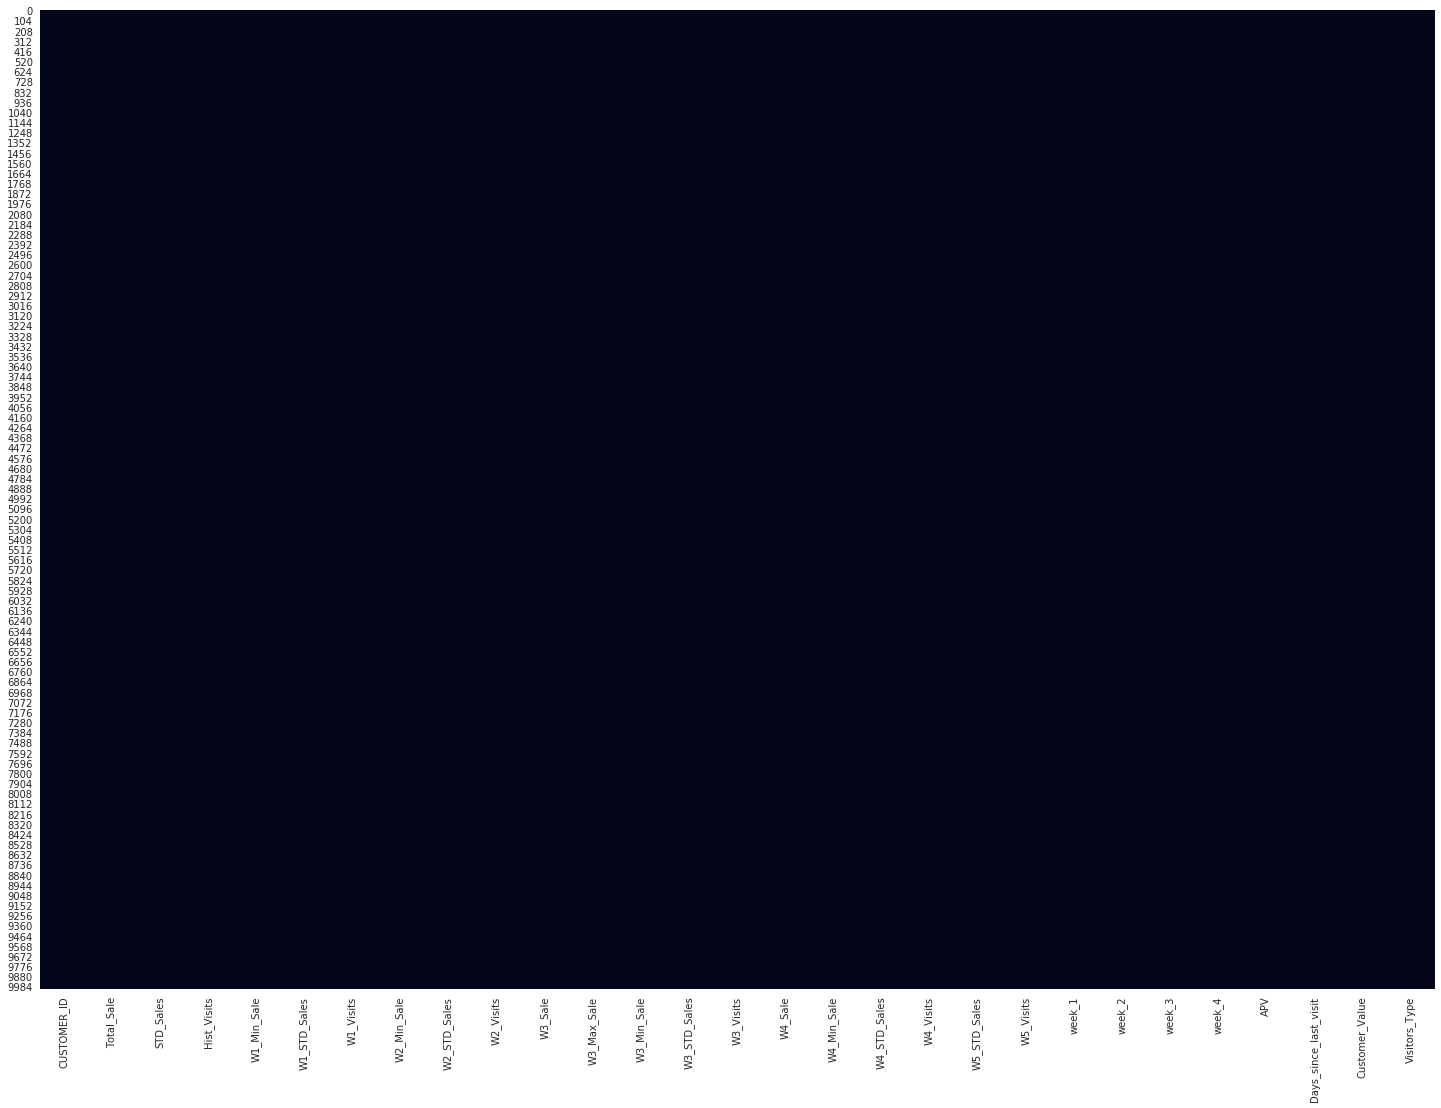

In [15]:
sns.heatmap(df.isnull(),cbar = False)

Inference : There are no null values in the data.

In [16]:
# checking for wrongly Identified datatypes

df.dtypes

CUSTOMER_ID                int64
Total_Sale               float64
STD_Sales                float64
Hist_Visits              float64
W1_Min_Sale              float64
W1_STD_Sales             float64
W1_Visits                  int64
W2_Min_Sale              float64
W2_STD_Sales             float64
W2_Visits                  int64
W3_Sale                  float64
W3_Max_Sale              float64
W3_Min_Sale              float64
W3_STD_Sales             float64
W3_Visits                  int64
W4_Sale                  float64
W4_Min_Sale              float64
W4_STD_Sales             float64
W4_Visits                  int64
W5_STD_Sales             float64
W5_Visits                  int64
week_1                     int64
week_2                     int64
week_3                     int64
week_4                     int64
APV                      float64
Days_since_last_visit    float64
Customer_Value            object
Visitors_Type             object
dtype: object

Inference : The datatypes have been correctly assigned

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


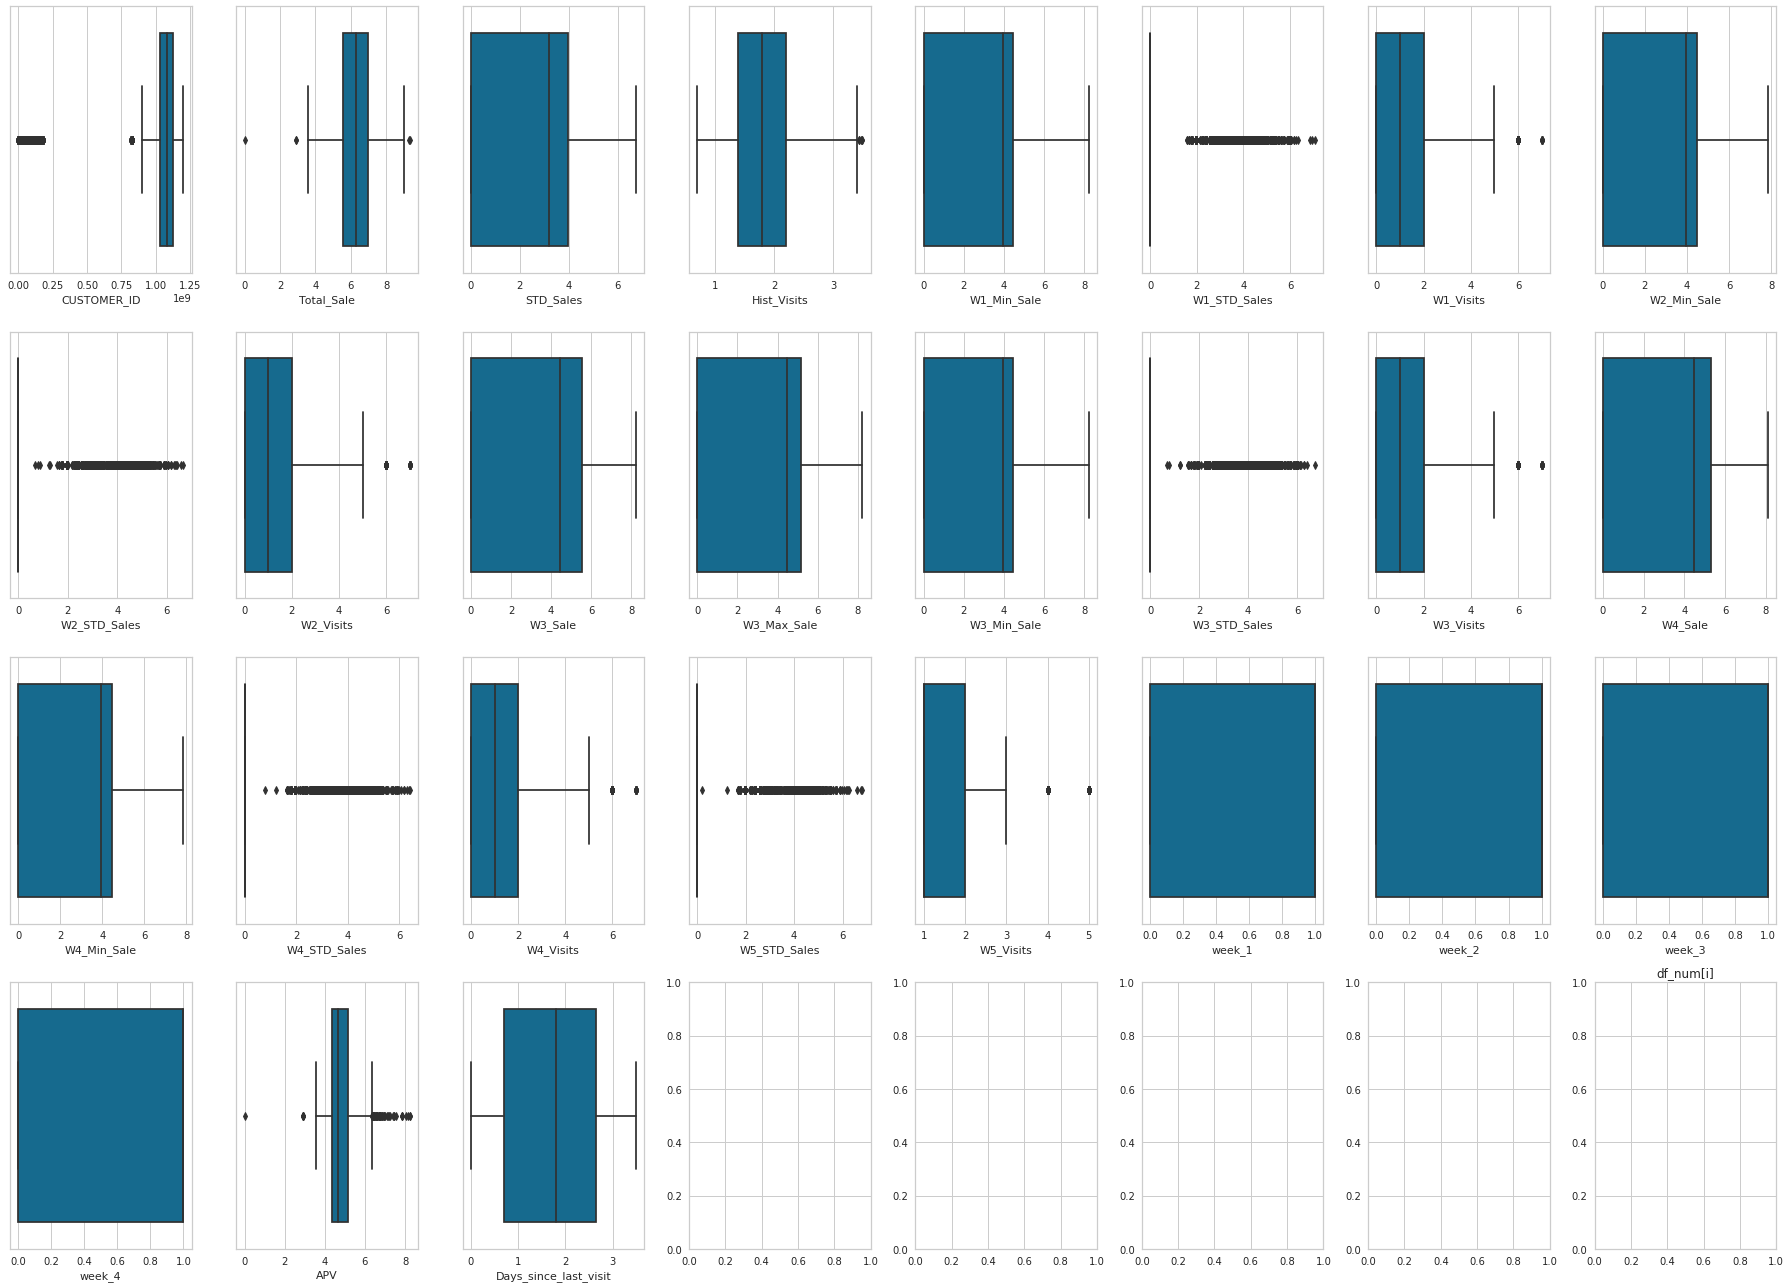

In [17]:
# checking for outliers

df_num = df.select_dtypes(include = np.number)

fig, ax = plt.subplots(4,8,figsize = (25,18))
for i,subplots in zip(df_num.columns, ax.flatten()):
    sns.boxplot(df_num[i],ax = subplots)
    plt.title('df_num[i]')
plt.tight_layout()
plt.show()

Inference :

- Columns customer id, w1_std_sales, w2_std_sales, w3_std_sales, w4_std_sales, w5_std_sales, apv have a high number of outliers present in the data.

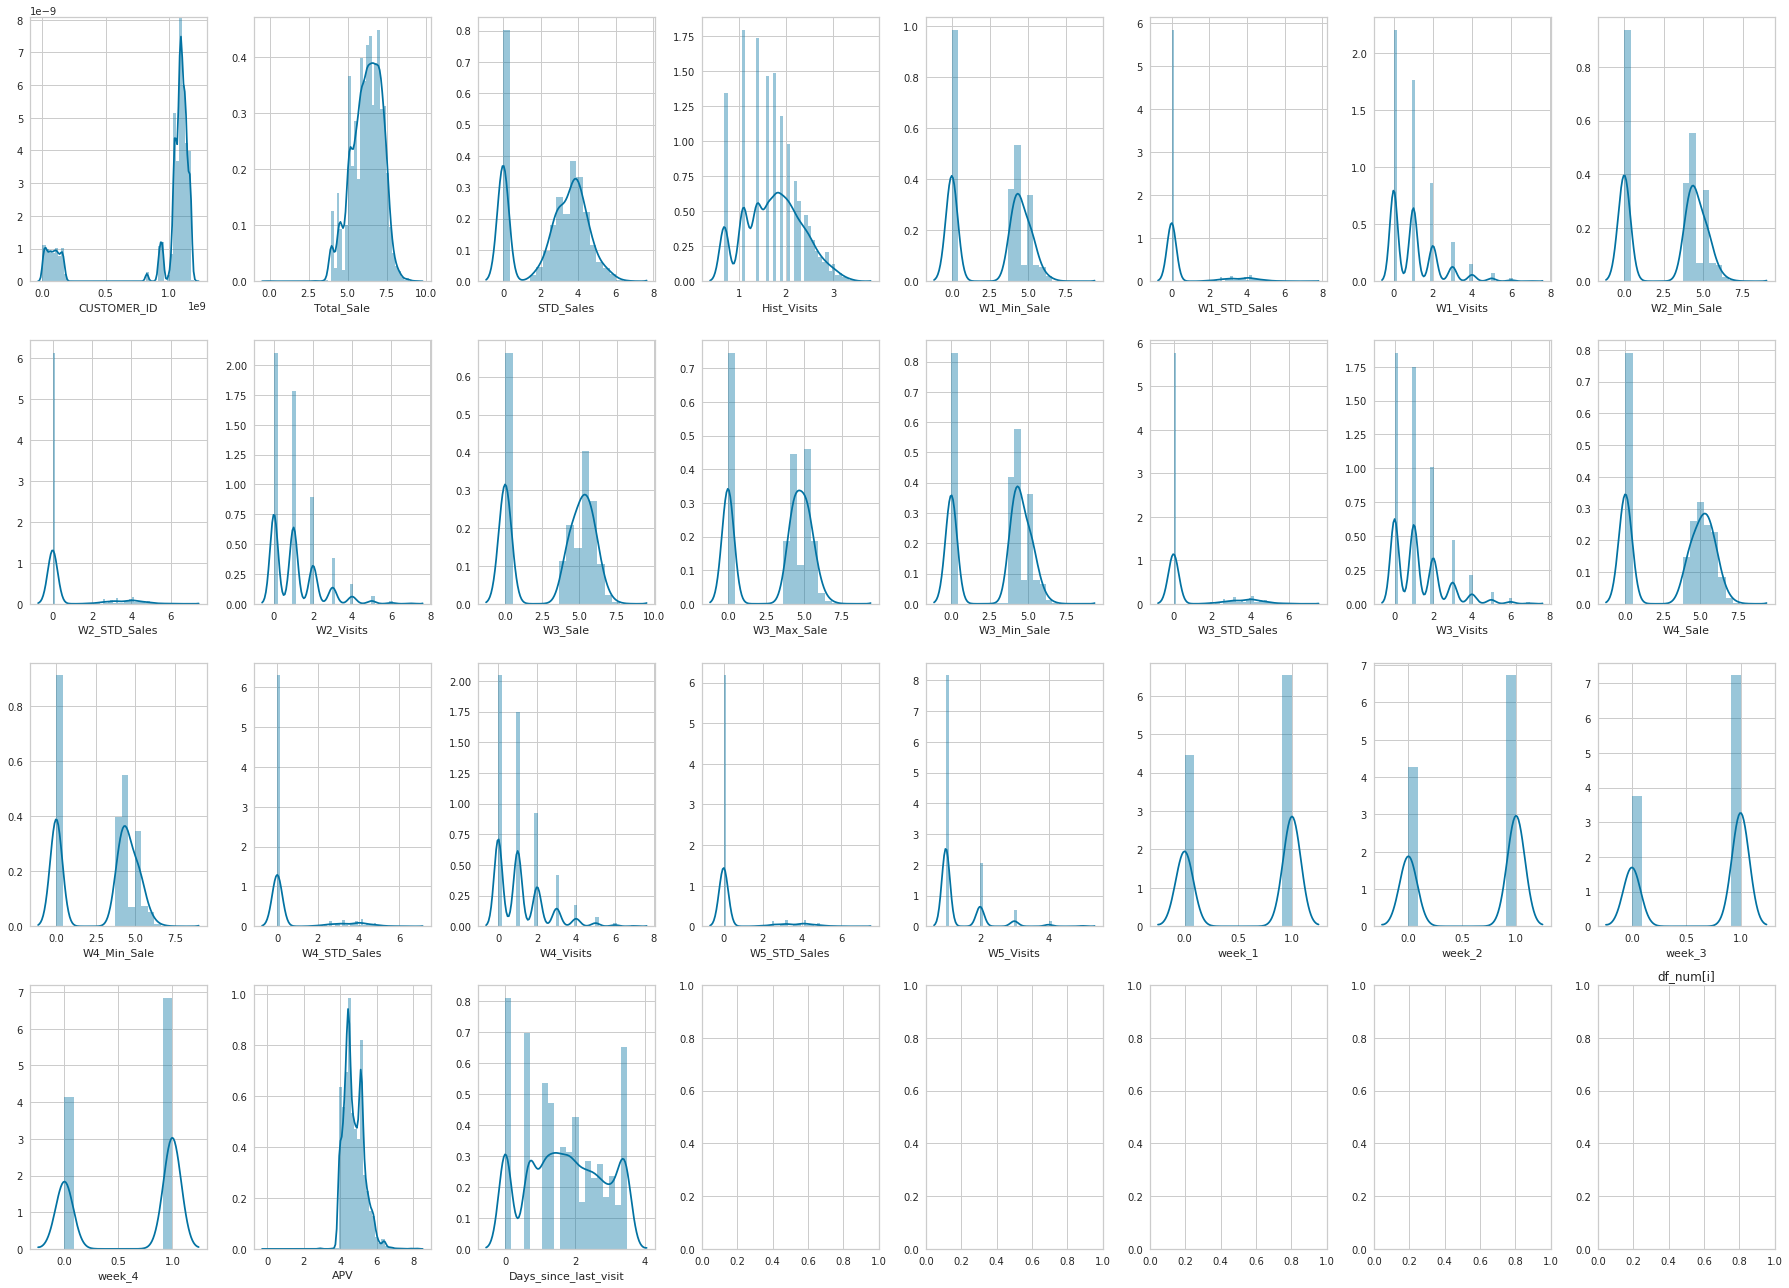

In [20]:
# checking the distribution of data

fig, ax = plt.subplots(4,8,figsize = (25,18))
for i,subplots in zip(df_num.columns, ax.flatten()):
    sns.distplot(df_num[i],ax = subplots)
    plt.title('df_num[i]')
plt.tight_layout()
plt.show()

Inference :

- For columns customer id, Total sales the distribution of data appears to be  left skewed.
- There is no column that displays normal distribution as such
- The columns with binomial categories, week_, week_2, week_3, week_4 have a higher concentration of dataapoints in the class 1 for each of these columns.
- Columns std_sales, w2_min sales, w3_max_sales w4_min_sales, w4_max_sales display a bimodal distribution amongst the datapoints.

In [21]:
print('Kurtosis of the data :')
df.kurt()

Kurtosis of the data :


CUSTOMER_ID              1.133045
Total_Sale              -0.160487
STD_Sales               -1.209504
Hist_Visits             -0.576067
W1_Min_Sale             -1.747270
W1_STD_Sales             2.384424
W1_Visits                2.294486
W2_Min_Sale             -1.704091
W2_STD_Sales             2.004546
W2_Visits                2.228830
W3_Sale                 -1.531367
W3_Max_Sale             -1.525904
W3_Min_Sale             -1.513579
W3_STD_Sales             0.834161
W3_Visits                1.664513
W4_Sale                 -1.681414
W4_Min_Sale             -1.673460
W4_STD_Sales             1.655951
W4_Visits                2.006649
W5_STD_Sales             3.168084
W5_Visits                5.771753
week_1                  -1.852851
week_2                  -1.788306
week_3                  -1.554324
week_4                  -1.743666
APV                      1.797942
Days_since_last_visit   -1.088900
dtype: float64

Inference :

- Column W5_std_sales shows a mesokurtic behaviour with a kurtosis of 3.1, meaning that the majority of the datapoints are in a similar range with fewer outliers.
- Column W5_visits displays a platykurtic behaviour with kurtosis of 5.77, indicating a high presence of outliers in the column.
- All the other columns display a mesokurtic behaviour, indicating that the datapoints are closer to mean of the variabele with a moderate to low presence of outliers.

In [32]:
# Checking for unique values in the categorical columns 

print(df['Customer_Value'].unique())
print(df['Visitors_Type'].unique())

['Regular' 'High_Value' 'Low_Value']
['Regular_Visitors' 'Frequent_Visitor' 'Rare_Visitor']


Inference : There are three different classes in each categorical column.

##### Data Preparation :

In [22]:
# removing outliers

q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

iqr = q3 - q1

ll = q1 - 1.5*iqr
ul = q3 + 1.5*iqr

df_outliers = df[~((df < ll)|(df > ul)).any(axis = 1)]

df_outliers.shape

(4318, 29)

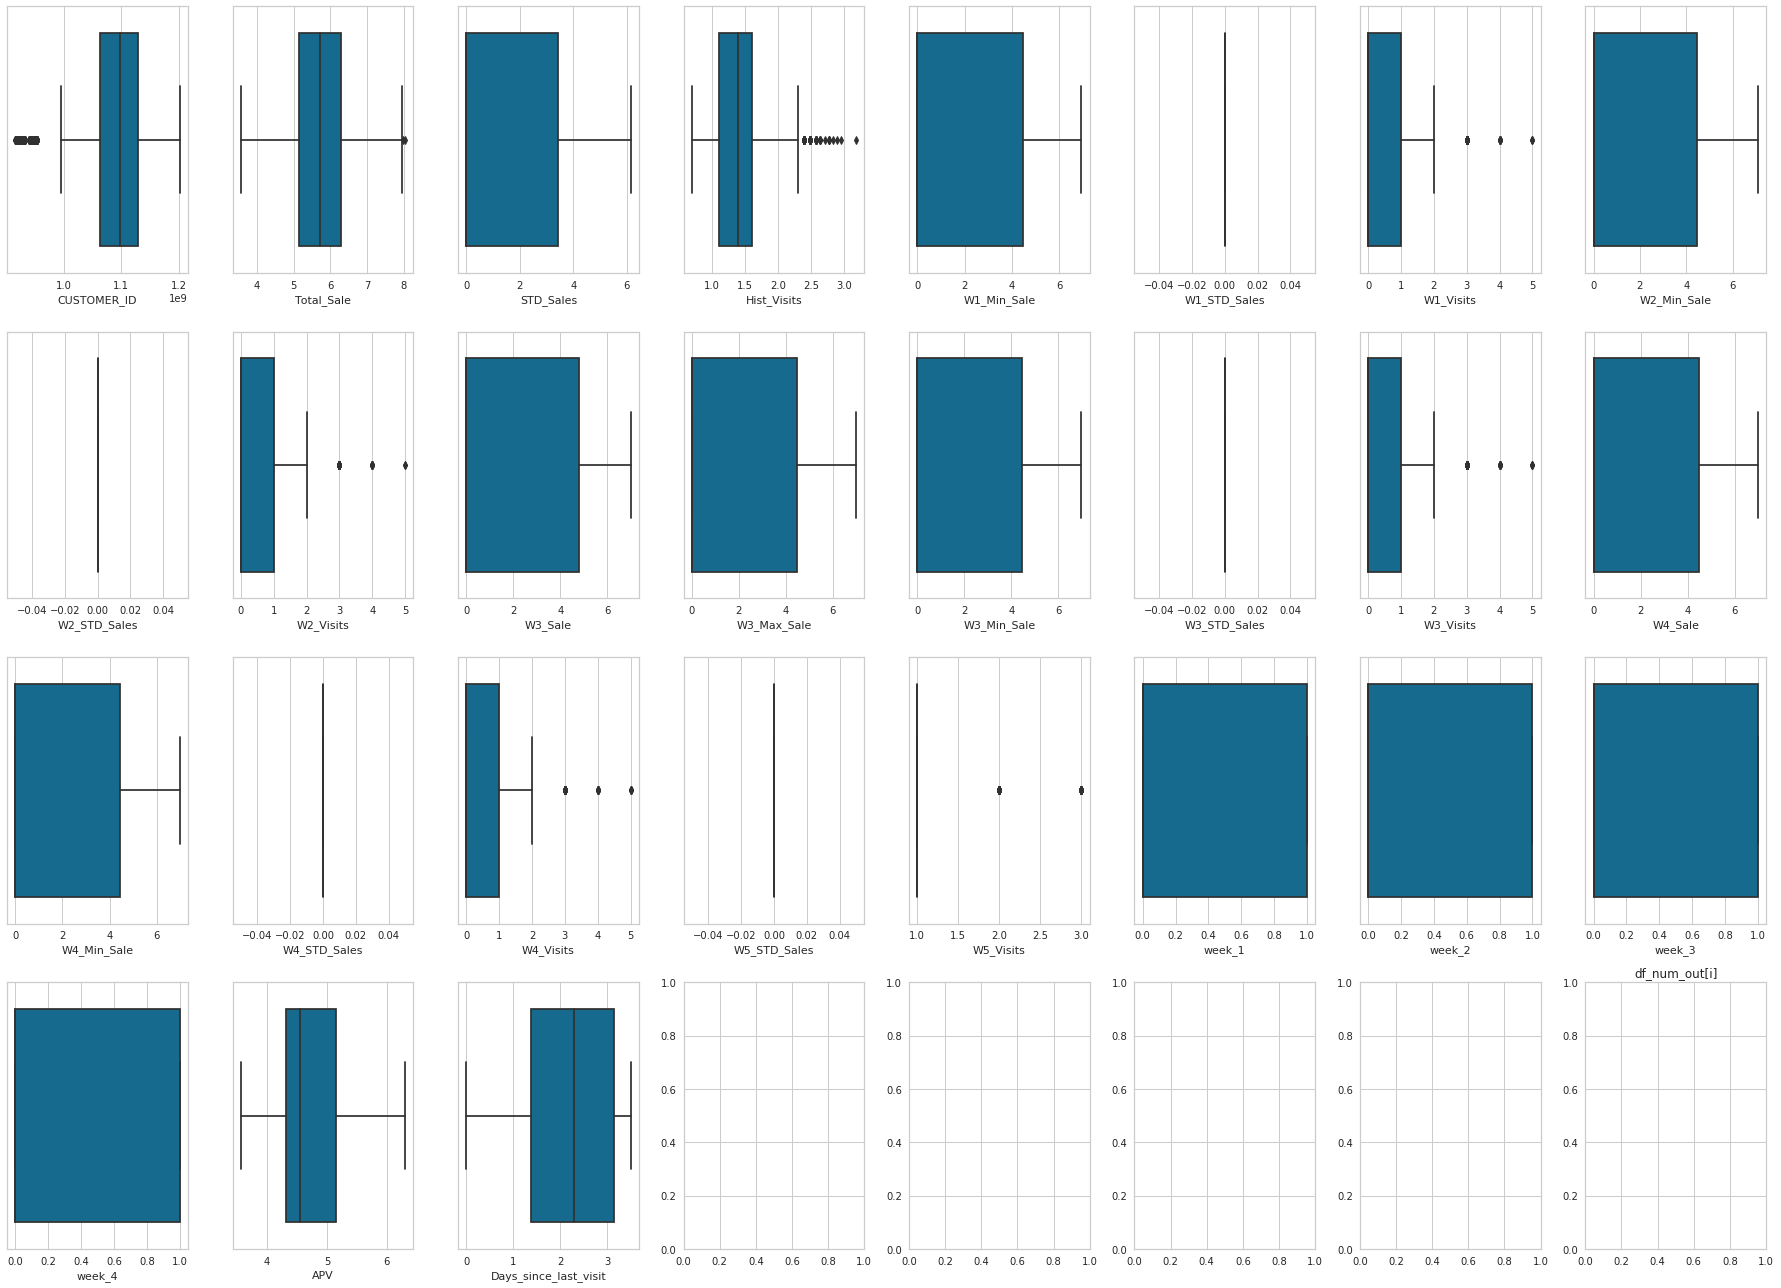

In [23]:
df_num_out = df_outliers.select_dtypes(include = np.number)

fig, ax = plt.subplots(4,8,figsize = (25,18))
for i,subplots in zip(df_num_out.columns, ax.flatten()):
    sns.boxplot(df_num_out[i],ax = subplots)
    plt.title('df_num_out[i]')
plt.tight_layout()
plt.show()

In [24]:
# checking for missing values after outlier treatment

df.isnull().sum()

CUSTOMER_ID              0
Total_Sale               0
STD_Sales                0
Hist_Visits              0
W1_Min_Sale              0
W1_STD_Sales             0
W1_Visits                0
W2_Min_Sale              0
W2_STD_Sales             0
W2_Visits                0
W3_Sale                  0
W3_Max_Sale              0
W3_Min_Sale              0
W3_STD_Sales             0
W3_Visits                0
W4_Sale                  0
W4_Min_Sale              0
W4_STD_Sales             0
W4_Visits                0
W5_STD_Sales             0
W5_Visits                0
week_1                   0
week_2                   0
week_3                   0
week_4                   0
APV                      0
Days_since_last_visit    0
Customer_Value           0
Visitors_Type            0
dtype: int64

In [27]:
# Since the data has a variance among the data point s we will be scaling the data
# scaling will be done using the z-score standardisation technique.
# After scaling the mean of the data would be 0 and standard deviation would be 1.

df_cat = df_outliers.select_dtypes(exclude=np.number)

sc = StandardScaler()

df_sc = pd.DataFrame(sc.fit_transform(df_num_out),columns = df_num_out.columns)

df_scaled = pd.concat([df_sc,df_cat])
df_scaled.describe()

,CUSTOMER_ID,Total_Sale,STD_Sales,Hist_Visits,W1_Min_Sale,W1_STD_Sales,W1_Visits,W2_Min_Sale,W2_STD_Sales,W2_Visits,...,W4_STD_Sales,W4_Visits,W5_STD_Sales,W5_Visits,week_1,week_2,week_3,week_4,APV,Days_since_last_visit
count,4.318000e+03,4.318000e+03,4.318000e+03,4.318000e+03,4.318000e+03,4318.0,4.318000e+03,4.318000e+03,4318.0,4.318000e+03,...,4318.0,4.318000e+03,4318.0,4.318000e+03,4.318000e+03,4.318000e+03,4.318000e+03,4.318000e+03,4.318000e+03,4.318000e+03
mean,-8.226526e-16,1.249682e-15,4.502600e-16,3.302746e-15,1.358442e-15,0.0,1.249055e-14,-6.479301e-17,0.0,1.573390e-15,...,0.0,6.287853e-15,0.0,-1.533332e-15,-1.354945e-15,1.091659e-15,1.939985e-15,-7.668612e-15,1.100453e-16,1.445655e-15
std,1.000116e+00,1.000116e+00,1.000116e+00,1.000116e+00,1.000116e+00,0.0,1.000116e+00,1.000116e+00,0.0,1.000116e+00,...,0.0,1.000116e+00,0.0,1.000116e+00,1.000116e+00,1.000116e+00,1.000116e+00,1.000116e+00,1.000116e+00,1.000116e+00
min,-3.234707e+00,-2.463023e+00,-8.769405e-01,-1.445090e+00,-8.481683e-01,0.0,-7.478562e-01,-8.760174e-01,0.0,-7.693514e-01,...,0.0,-7.470755e-01,0.0,-2.721913e-01,-8.592586e-01,-8.881061e-01,-9.725850e-01,-8.731832e-01,-2.113136e+00,-2.111734e+00
25%,-5.278864e-01,-6.370647e-01,-8.769405e-01,-5.464473e-01,-8.481683e-01,0.0,-7.478562e-01,-8.760174e-01,0.0,-7.693514e-01,...,0.0,-7.470755e-01,0.0,-2.721913e-01,-8.592586e-01,-8.881061e-01,-9.725850e-01,-8.731832e-01,-7.272525e-01,-7.708203e-01
50%,9.992836e-02,4.158949e-03,-8.769405e-01,9.114957e-02,-8.481683e-01,0.0,-7.478562e-01,-8.760174e-01,0.0,-7.693514e-01,...,0.0,-7.470755e-01,0.0,-2.721913e-01,-8.592586e-01,-8.881061e-01,-9.725850e-01,-8.731832e-01,-2.964029e-01,1.154758e-01
75%,6.589818e-01,6.605898e-01,9.547390e-01,5.857081e-01,1.025735e+00,0.0,7.239957e-01,9.871387e-01,0.0,6.800637e-01,...,0.0,6.356386e-01,0.0,-2.721913e-01,1.163794e+00,1.125992e+00,1.028188e+00,1.145235e+00,7.882787e-01,9.211197e-01
max,1.999852e+00,2.683289e+00,2.391137e+00,4.062270e+00,2.065014e+00,0.0,6.611403e+00,2.084776e+00,0.0,6.477724e+00,...,0.0,6.166495e+00,0.0,6.580998e+00,1.163794e+00,1.125992e+00,1.028188e+00,1.145235e+00,2.908184e+00,1.270315e+00


In [28]:
df_scaled.std()

CUSTOMER_ID              1.000116
Total_Sale               1.000116
STD_Sales                1.000116
Hist_Visits              1.000116
W1_Min_Sale              1.000116
W1_STD_Sales             0.000000
W1_Visits                1.000116
W2_Min_Sale              1.000116
W2_STD_Sales             0.000000
W2_Visits                1.000116
W3_Sale                  1.000116
W3_Max_Sale              1.000116
W3_Min_Sale              1.000116
W3_STD_Sales             0.000000
W3_Visits                1.000116
W4_Sale                  1.000116
W4_Min_Sale              1.000116
W4_STD_Sales             0.000000
W4_Visits                1.000116
W5_STD_Sales             0.000000
W5_Visits                1.000116
week_1                   1.000116
week_2                   1.000116
week_3                   1.000116
week_4                   1.000116
APV                      1.000116
Days_since_last_visit    1.000116
dtype: float64

In [29]:
# Dropping the unnecessary columns 

# Customer id is a unique column which cannot be used for clustering as it does not contribute towards any category
# Columns with zero standard deviation do not have alot of variance in the data cthat can be used for model building.
# Columns that have weekly std sales info have zero std for all hthe five weeks, basically being not helpful with the information provided.


df_scaled.drop(['CUSTOMER_ID','W1_STD_Sales','W2_STD_Sales','W3_STD_Sales','W4_STD_Sales','W5_STD_Sales'],axis = 1, inplace = True)

In [30]:
df_scaled.shape

(8636, 23)

In [34]:
# Encoding the Categorical columns - for PCA and Model building.

df_enc = pd.get_dummies(df_scaled)
df_enc.head()

,Total_Sale,STD_Sales,Hist_Visits,W1_Min_Sale,W1_Visits,W2_Min_Sale,W2_Visits,W3_Sale,W3_Max_Sale,W3_Min_Sale,...,week_2,week_3,week_4,APV,Days_since_last_visit,Customer_Value_Low_Value,Customer_Value_Regular,Visitors_Type_Frequent_Visitor,Visitors_Type_Rare_Visitor,Visitors_Type_Regular_Visitors
0,0.543675,0.339682,1.331440,0.933218,0.723996,0.987139,0.680064,1.110380,0.894240,0.894240,...,1.125992,1.028188,1.145235,-0.593459,-1.049085,0,0,0,0,0
1,1.380603,0.608601,0.989792,1.390624,0.723996,1.349935,0.680064,1.183149,1.254880,1.254880,...,1.125992,1.028188,1.145235,1.058250,-0.554981,0,0,0,0,0
2,-1.220554,-0.876941,-0.546447,-0.848168,-0.747856,0.777007,0.680064,-0.955547,-0.957848,-0.957848,...,1.125992,-0.972585,-0.873183,-1.388985,0.440934,0,0,0,0,0
3,-1.220554,-0.876941,-0.546447,-0.848168,-0.747856,0.777007,0.680064,-0.955547,-0.957848,-0.957848,...,1.125992,-0.972585,-0.873183,-1.388985,0.440934,0,0,0,0,0
4,0.622922,-0.876941,0.091150,1.314449,0.723996,-0.876017,-0.769351,1.110380,1.179592,1.179592,...,-0.888106,1.028188,-0.873183,0.788279,-0.554981,0,0,0,0,0


In [35]:
df_enc.shape

(8636, 26)

In [47]:
df_enc.isnull().sum()

Total_Sale                        4318
STD_Sales                         4318
Hist_Visits                       4318
W1_Min_Sale                       4318
W1_Visits                         4318
W2_Min_Sale                       4318
W2_Visits                         4318
W3_Sale                           4318
W3_Max_Sale                       4318
W3_Min_Sale                       4318
W3_Visits                         4318
W4_Sale                           4318
W4_Min_Sale                       4318
W4_Visits                         4318
W5_Visits                         4318
week_1                            4318
week_2                            4318
week_3                            4318
week_4                            4318
APV                               4318
Days_since_last_visit             4318
Customer_Value_Low_Value             0
Customer_Value_Regular               0
Visitors_Type_Frequent_Visitor       0
Visitors_Type_Rare_Visitor           0
Visitors_Type_Regular_Vis

In [48]:
df_enc.columns

Index(['Total_Sale', 'STD_Sales', 'Hist_Visits', 'W1_Min_Sale', 'W1_Visits',
       'W2_Min_Sale', 'W2_Visits', 'W3_Sale', 'W3_Max_Sale', 'W3_Min_Sale',
       'W3_Visits', 'W4_Sale', 'W4_Min_Sale', 'W4_Visits', 'W5_Visits',
       'week_1', 'week_2', 'week_3', 'week_4', 'APV', 'Days_since_last_visit',
       'Customer_Value_Low_Value', 'Customer_Value_Regular',
       'Visitors_Type_Frequent_Visitor', 'Visitors_Type_Rare_Visitor',
       'Visitors_Type_Regular_Visitors'],
      dtype='object')

In [51]:
# missing value treatment

df_enc['Total_Sale'] = df_enc['Total_Sale'].replace(np.nan,df_enc['Total_Sale'].mean())
df_enc['STD_Sales'] = df_enc['STD_Sales'].replace(np.nan,df_enc['STD_Sales'].mean())
df_enc['Hist_Visits'] = df_enc['Hist_Visits'].replace(np.nan,df_enc['Hist_Visits'].mean())
df_enc['W1_Min_Sale'] = df_enc['W1_Min_Sale'].replace(np.nan,df_enc['W1_Min_Sale'].mean())
df_enc['W1_Visits'] = df_enc['W1_Visits'].replace(np.nan,df_enc['W1_Visits'].mean())
df_enc['W2_Min_Sale'] = df_enc['W2_Min_Sale'].replace(np.nan,df_enc['W2_Min_Sale'].mean())
df_enc['W2_Visits'] = df_enc['W2_Visits'].replace(np.nan,df_enc['W2_Visits'].mean())
df_enc['W3_Sale'] = df_enc['W3_Sale'].replace(np.nan,df_enc['W3_Sale'].mean())
df_enc['W3_Max_Sale'] = df_enc['W3_Max_Sale'].replace(np.nan,df_enc['W3_Max_Sale'].mean())
df_enc['W3_Min_Sale'] = df_enc['W3_Min_Sale'].replace(np.nan,df_enc['W3_Min_Sale'].mean())
df_enc['W3_Visits'] = df_enc['W3_Visits'].replace(np.nan,df_enc['W3_Visits'].mean())
df_enc['W4_Sale'] = df_enc['W4_Sale'].replace(np.nan,df_enc['W4_Sale'].mean())
df_enc['W4_Min_Sale'] = df_enc['W4_Min_Sale'].replace(np.nan,df_enc['W4_Min_Sale'].mean())
df_enc['W4_Visits'] = df_enc['W4_Visits'].replace(np.nan,df_enc['W4_Visits'].mean())
df_enc['W5_Visits'] = df_enc['W5_Visits'].replace(np.nan,df_enc['W5_Visits'].mean())
df_enc['week_1'] = df_enc['week_1'].replace(np.nan,df_enc['week_1'].mean())
df_enc['week_2'] = df_enc['week_2'].replace(np.nan,df_enc['week_2'].mean())
df_enc['week_3'] = df_enc['week_3'].replace(np.nan,df_enc['week_3'].mean())
df_enc['week_4'] = df_enc['week_4'].replace(np.nan,df_enc['week_4'].mean())
df_enc['APV'] = df_enc['APV'].replace(np.nan,df_enc['APV'].mean())

In [53]:
df_enc['Days_since_last_visit'] = df['Days_since_last_visit'].replace(np.nan,df_enc['Days_since_last_visit'].mean())

In [54]:
df_enc.isnull().sum()

Total_Sale                        0
STD_Sales                         0
Hist_Visits                       0
W1_Min_Sale                       0
W1_Visits                         0
W2_Min_Sale                       0
W2_Visits                         0
W3_Sale                           0
W3_Max_Sale                       0
W3_Min_Sale                       0
W3_Visits                         0
W4_Sale                           0
W4_Min_Sale                       0
W4_Visits                         0
W5_Visits                         0
week_1                            0
week_2                            0
week_3                            0
week_4                            0
APV                               0
Days_since_last_visit             0
Customer_Value_Low_Value          0
Customer_Value_Regular            0
Visitors_Type_Frequent_Visitor    0
Visitors_Type_Rare_Visitor        0
Visitors_Type_Regular_Visitors    0
dtype: int64

### 3.	Dimensionality Reduction (15 marks)

a.	How will you decide when to apply PCA based on the correlation? (2 marks) 

b.	Apply PCA on the above dataset and determine the number of PCA components to be used so that 90% of the variance in data is explained by the same. (7 marks)

c.	Build a data frame with the principal components and check if multi-collinearity still exists. ( 2  marks).

d.	Visualize the spread of data across PCA components. (2 marks)

e.	Check for outliers in the PCA data and treat the same. (2 marks)


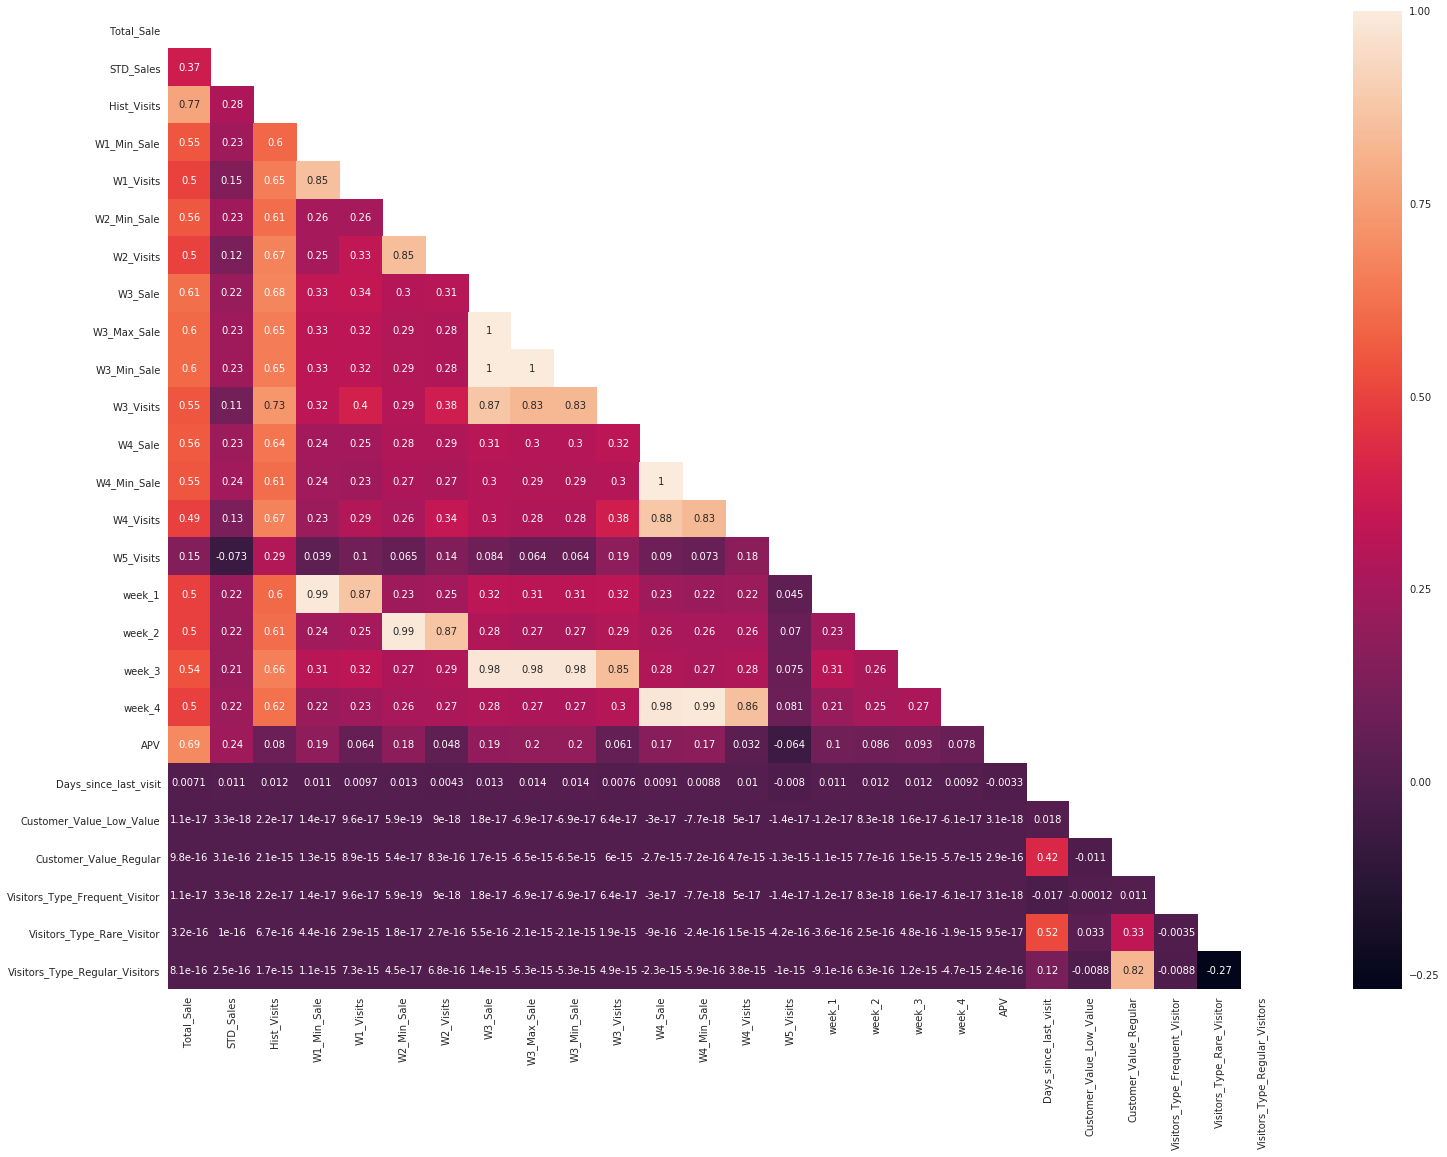

In [55]:
# checking for multicollineartiy

sns.heatmap(df_enc.corr(),annot = True, mask = np.triu(df_enc.corr()))

Inference :

- Column Days_since_last_visit shares a negative correlation with all the columns.
- All the other columns share a moderate to high collinearity with each other ranging from 0.3 to 0.9
- Some columns such as week_3, week_4, hist_visits have a comparatively higher correlation with other variables.

##### PCA :

- PCA (Principal Component Analysis) is a technique applied when there is multi collinearity present in the data.

- PCA reduces the dimentionality of the data creating components with highest inferential values.

- It also helps with better interpretebility of dataset in unsupervised leearning clusters  modelling.

- For our current dataset there is a high multicollinearity present. Performing PCA will help us extract the best instances at feature level which can be helpful for optimum model building.

In [75]:
# applying pca with 90% variation explained in data

pca = PCA(n_components=0.9,random_state=1)

pca_model = pca.fit_transform(df_enc)

print('Top eigen values :',pca.explained_variance_,'\n')
print('Top eigen vectors :',pca.components_,'\n')
print('Variation explained in the data :',pca.explained_variance_ratio_.sum())

Top eigen values : [4.34679151 1.4561843  1.26349802 1.1584443  1.01293746 0.73199881
 0.49957284 0.39879416] 

Top eigen vectors : [[ 2.88831941e-01  1.15761547e-01  3.22963148e-01  2.01217482e-01
   2.03268736e-01  1.99645454e-01  2.02537063e-01  2.72911384e-01
   2.67189287e-01  2.67189287e-01  2.61072263e-01  2.26946189e-01
   2.22078831e-01  2.18134886e-01  5.63835850e-02  1.95887224e-01
   1.92871505e-01  2.61886148e-01  2.16851575e-01  8.88232181e-02
   1.04191554e-02  4.91164967e-07  5.93662969e-04 -4.74535090e-07
   4.09153598e-04  1.85475071e-04]
 [ 3.25439725e-02  3.00382658e-02  5.10835316e-02 -3.61988813e-02
  -2.82721538e-02  8.87114492e-02  8.82428444e-02 -3.00077570e-01
  -3.05720387e-01 -3.05720387e-01 -2.33737012e-01  3.75462889e-01
   3.74186299e-01  3.36483472e-01  2.97435761e-02 -3.88103834e-02
   9.31824972e-02 -3.10536940e-01  3.79828898e-01 -4.08393215e-03
  -6.90152054e-03 -9.58389771e-07 -1.43401211e-03  9.15810589e-07
  -8.67398298e-04 -5.68488008e-04]
 [ 6.3

In [71]:
len(pca.explained_variance_)

8

Inference : For 90% of the data variation to be explained, there are a total of 8 PCA Components required.

In [77]:
# converting the pca components obtained into a dataframe for modelling.

pca_data = pd.DataFrame(pca_model,columns = ['C1','C2','C3','C4','C5','C6','C7','C8'])
pca_data.head()

,C1,C2,C3,C4,C5,C6,C7,C8
0,4.039950,-0.008778,0.801754,0.093644,0.019288,0.848486,-1.021437,0.426891
1,4.537380,0.359204,0.318794,0.346282,-0.157258,-1.016616,-0.334342,0.533755
2,-2.738282,0.366922,0.722044,1.402903,2.094716,1.212640,-0.728571,0.432931
3,-2.749729,0.374504,1.770675,1.416646,2.091866,1.211992,-0.736463,0.191385
4,0.902672,-3.079821,0.319922,0.096825,-1.922418,-0.348507,0.422723,0.504571


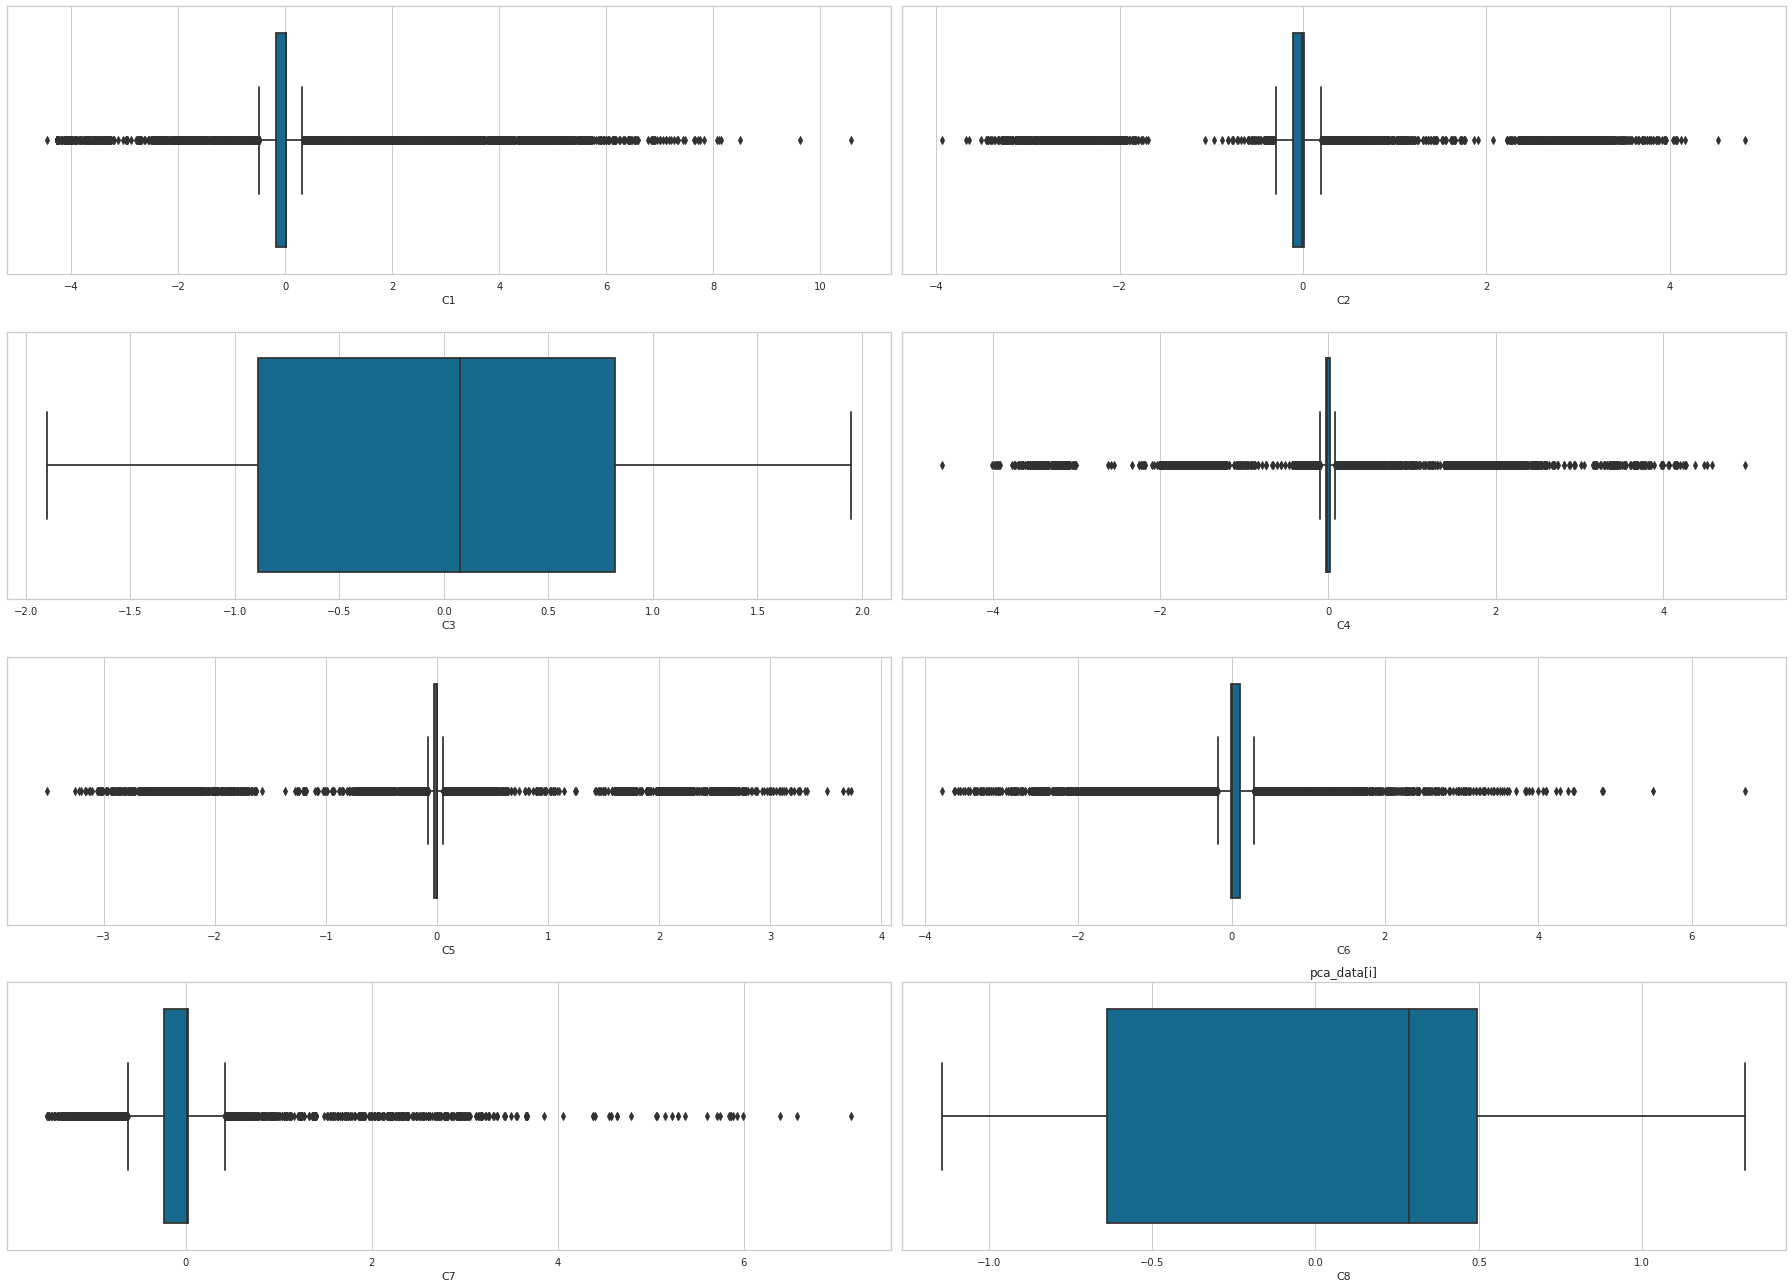

In [80]:
# checking for outliers

fig, ax = plt.subplots(4,2,figsize = (25,18))
for i,subplots in zip(pca_data.columns, ax.flatten()):
    sns.boxplot(pca_data[i],ax = subplots)
    plt.title('pca_data[i]')
plt.tight_layout()
plt.show()

Inference : Outliers are higly present in components 1, 2,4,5,6 and 7. 

Outliers will be performed and stored ina separate datarame to compare the models for best results.

In [97]:
# performing outlier treatment

q1 = pca_data.quantile(0.25)
q3 = pca_data.quantile(0.75)

iqr = q3 - q1

ll = q1 - 1.5*iqr
ul = q3 + 1.5*iqr

pca_wo = pca_data[~((pca_data < ll)|(pca_data > ul)).any(axis = 1)]

pca_wo.shape

(4318, 8)

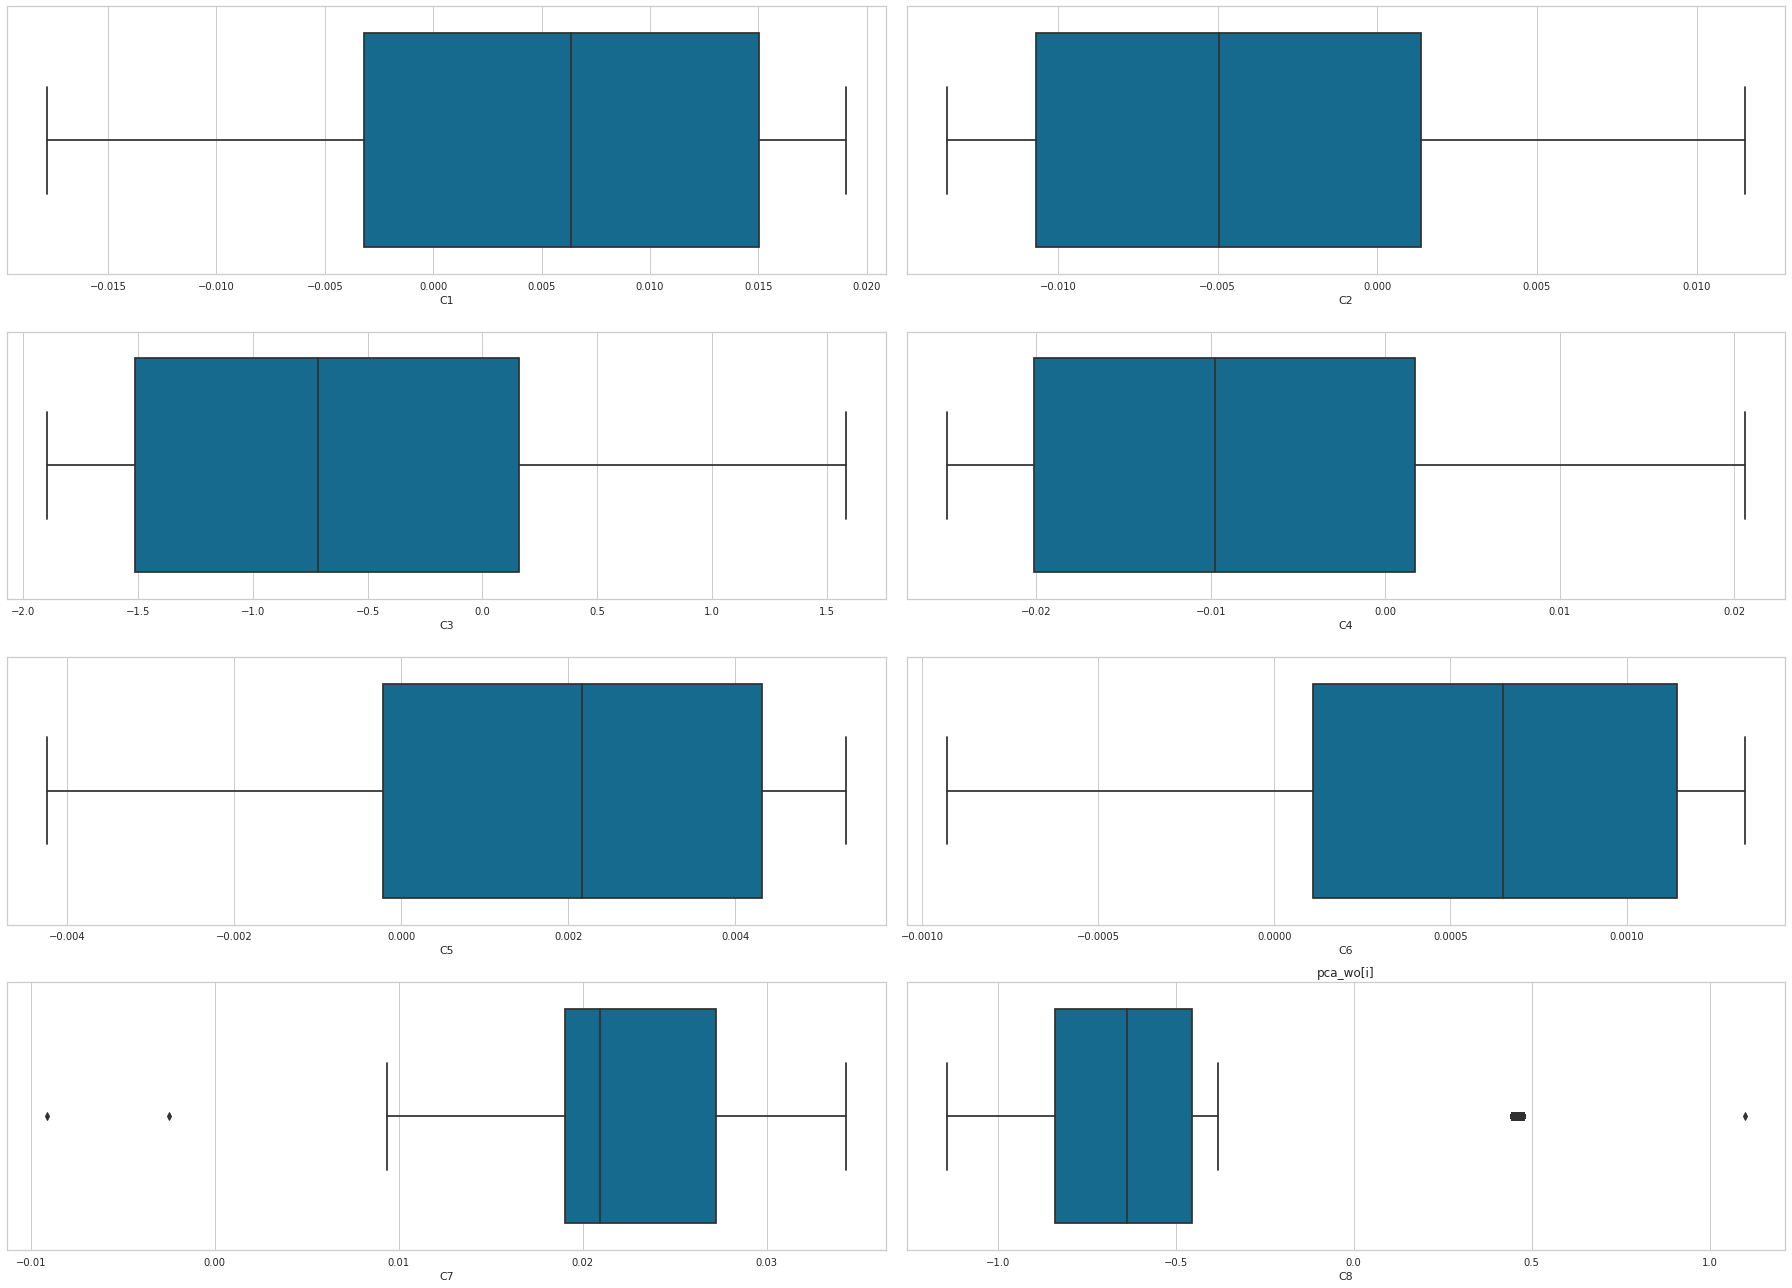

In [98]:
fig, ax = plt.subplots(4,2,figsize = (25,18))
for i,subplots in zip(pca_wo.columns, ax.flatten()):
    sns.boxplot(pca_wo[i],ax = subplots)
    plt.title('pca_wo[i]')
plt.tight_layout()
plt.show()

### Clustering: Use PCA dimensions to cluster the data. 

##### KMeans Clustering Model :

- KMeans clustering is a method where the clusters are formed by cinsidering the datapoints closest to the means.
- KMeans requires a parameter n_clusters where number of clusters can be given for clustering.


We'll be fiting a base model with KMeans algortihm.

In [85]:
km = KMeans()

base_model = km.fit(pca_data)
len(base_model.labels_)

8636

There are various methods by which we can determine the optimum number of clusters for the model. 

In [ ]:
# FOR DATA WITH OUTLIERS.

In [89]:
# METHOD 1 : wcss (within clusters sum of squares)

wcss = []

for i in range(2,8):
    km = KMeans(n_clusters = i)
    km.fit(pca_data)
    wcss.append(km.inertia_)
wcss   

[72245.69803880282,
 58171.09557581417,
 50622.94732186038,
 44287.992190589546,
 40565.55281517644,
 36834.92527298541]

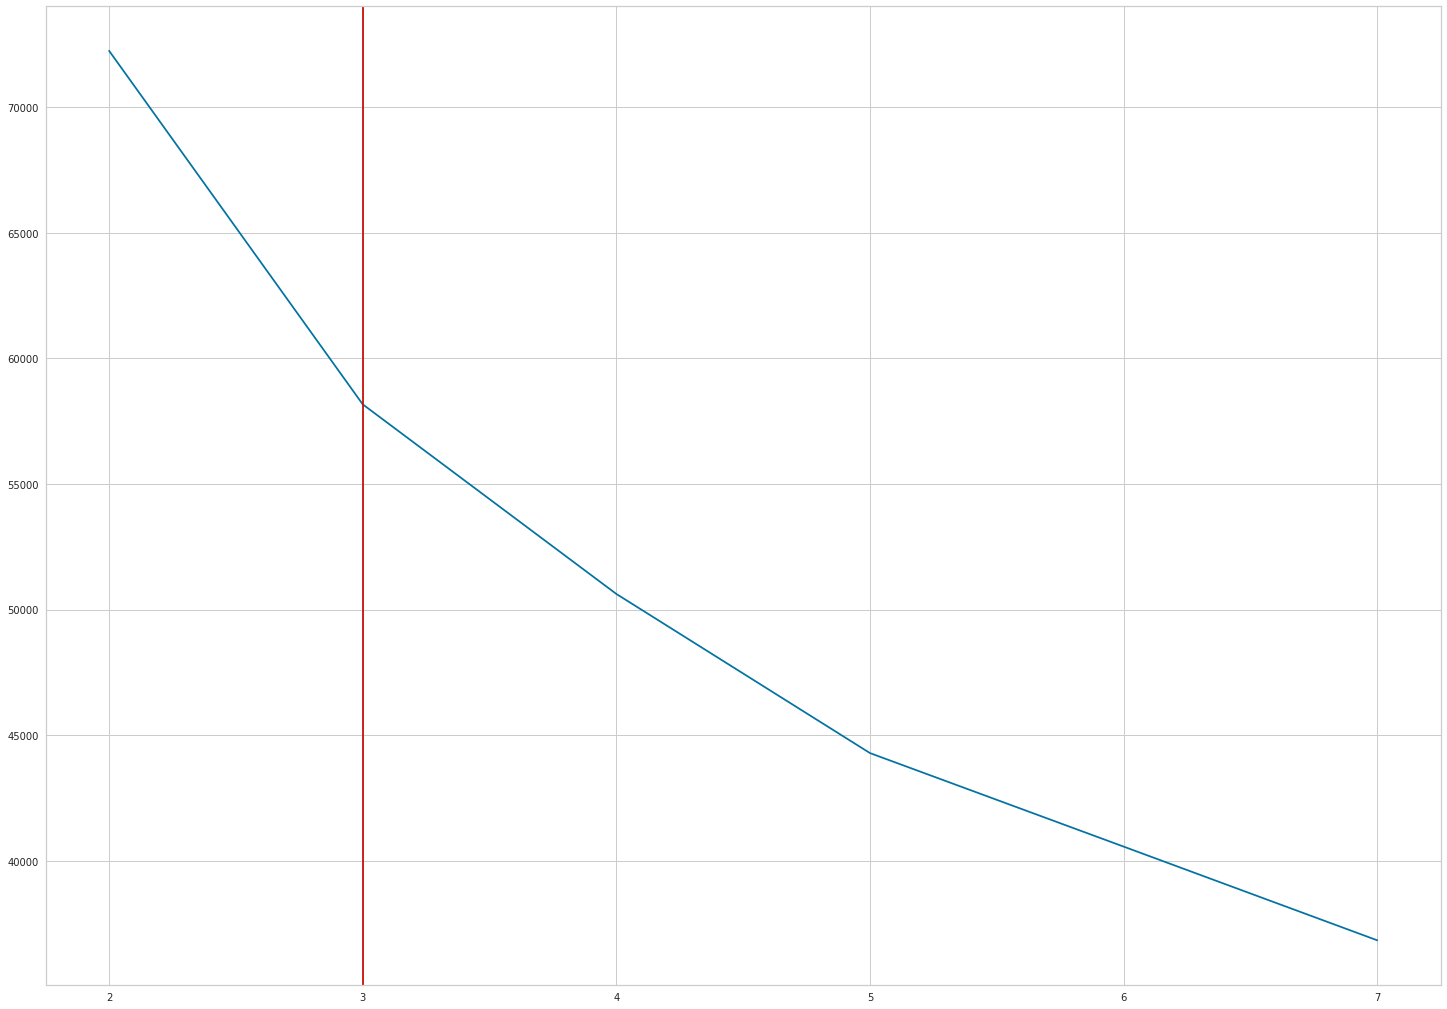

In [90]:
plt.plot(range(2,8),wcss)
plt.axvline(x = 3, color = 'r')
plt.show()

- Looking at the wcss score, It can be seen that means are displaying a density of datapoints in the range of 30,000 to 70,000 for 6 clusters.
- However in the plot we can observe that 3 clusters have a mean of 55000.
- So for this method we can conclude that 3 to 6 clusters could be the optimum number of clusters.

In [92]:
# METHOD 2 : silhouette score

silhouette = []

for i in range(2,8):
    km = KMeans(n_clusters = i,random_state = 1)
    km.fit(pca_data)
    cluster_num = km.labels_
    score = silhouette_score(pca_data,cluster_num)
    silhouette.append(score)
    print('For {} clusters the silhouette score is {}.'.format(i,score))

For 2 clusters the silhouette score is 0.3954304488334912.
For 3 clusters the silhouette score is 0.3706586428782095.
For 4 clusters the silhouette score is 0.40337105331482376.
For 5 clusters the silhouette score is 0.4360894775095006.
For 6 clusters the silhouette score is 0.34073922919218125.
For 7 clusters the silhouette score is 0.35899670400736156.


- Here the silhouette score is higher for 5 clusters, hence we can determine that as the optimum number for this method.

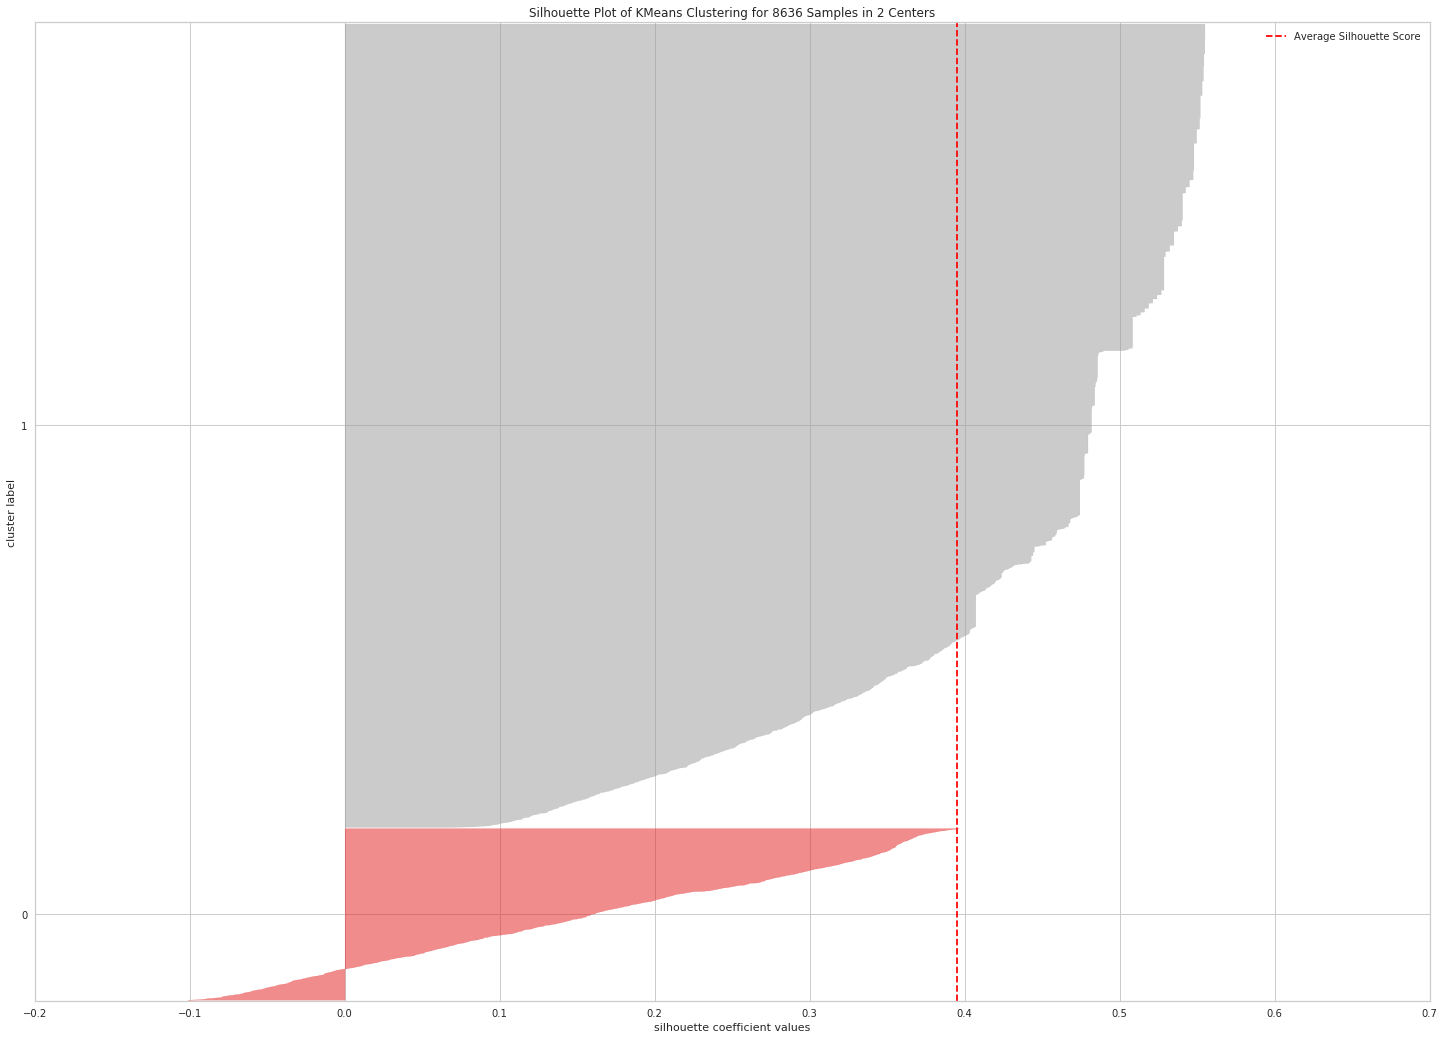

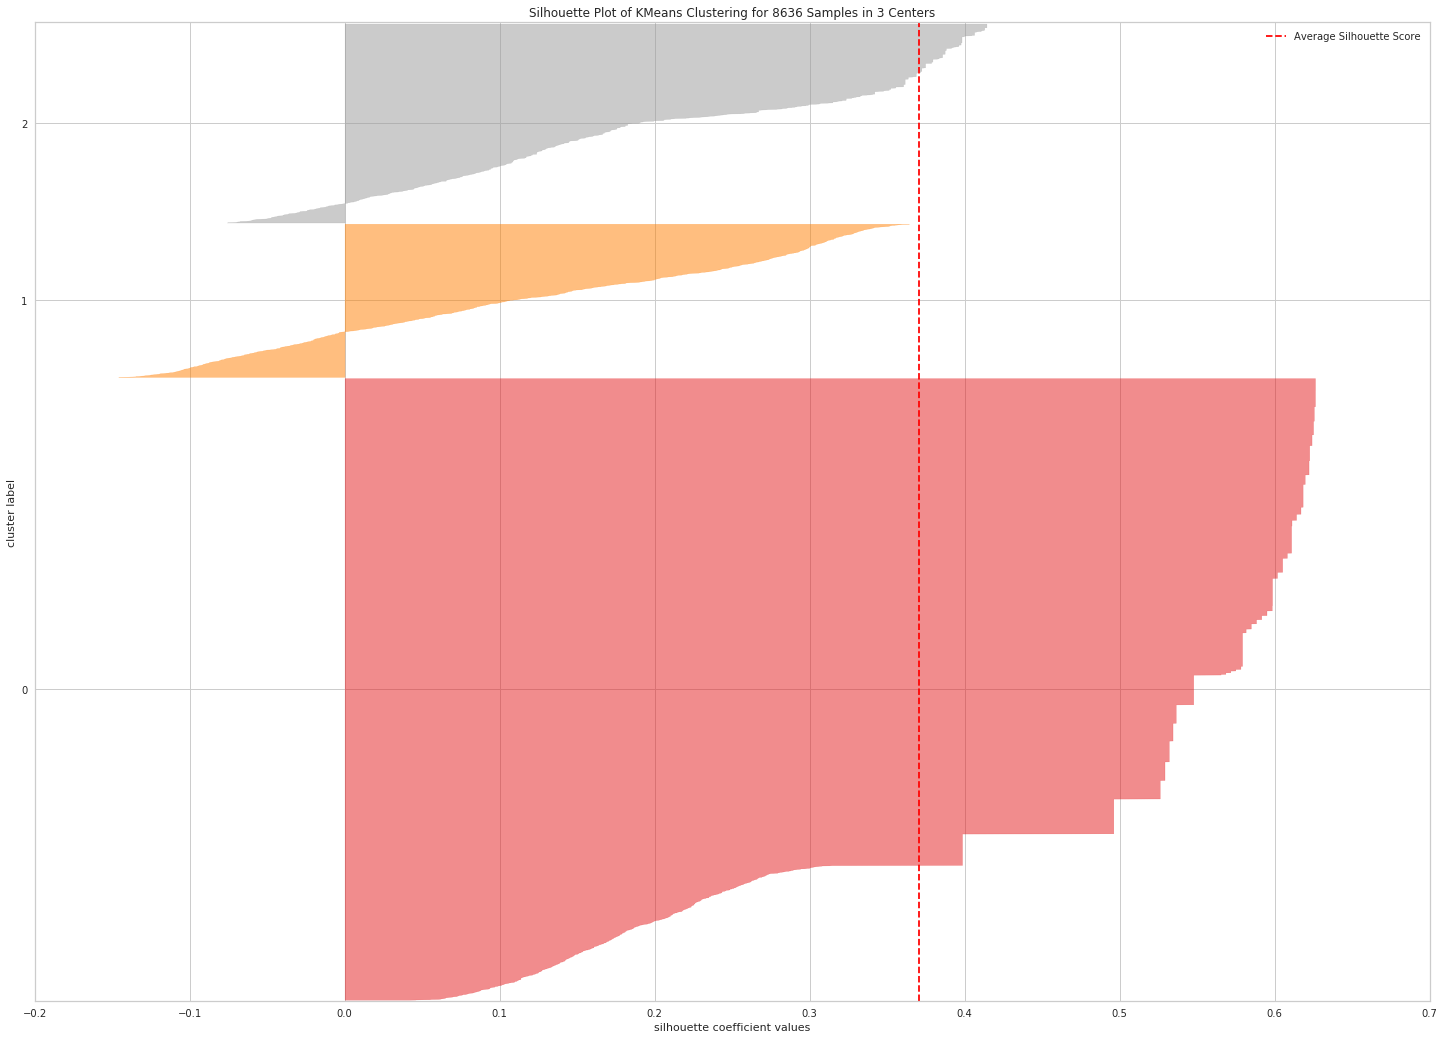

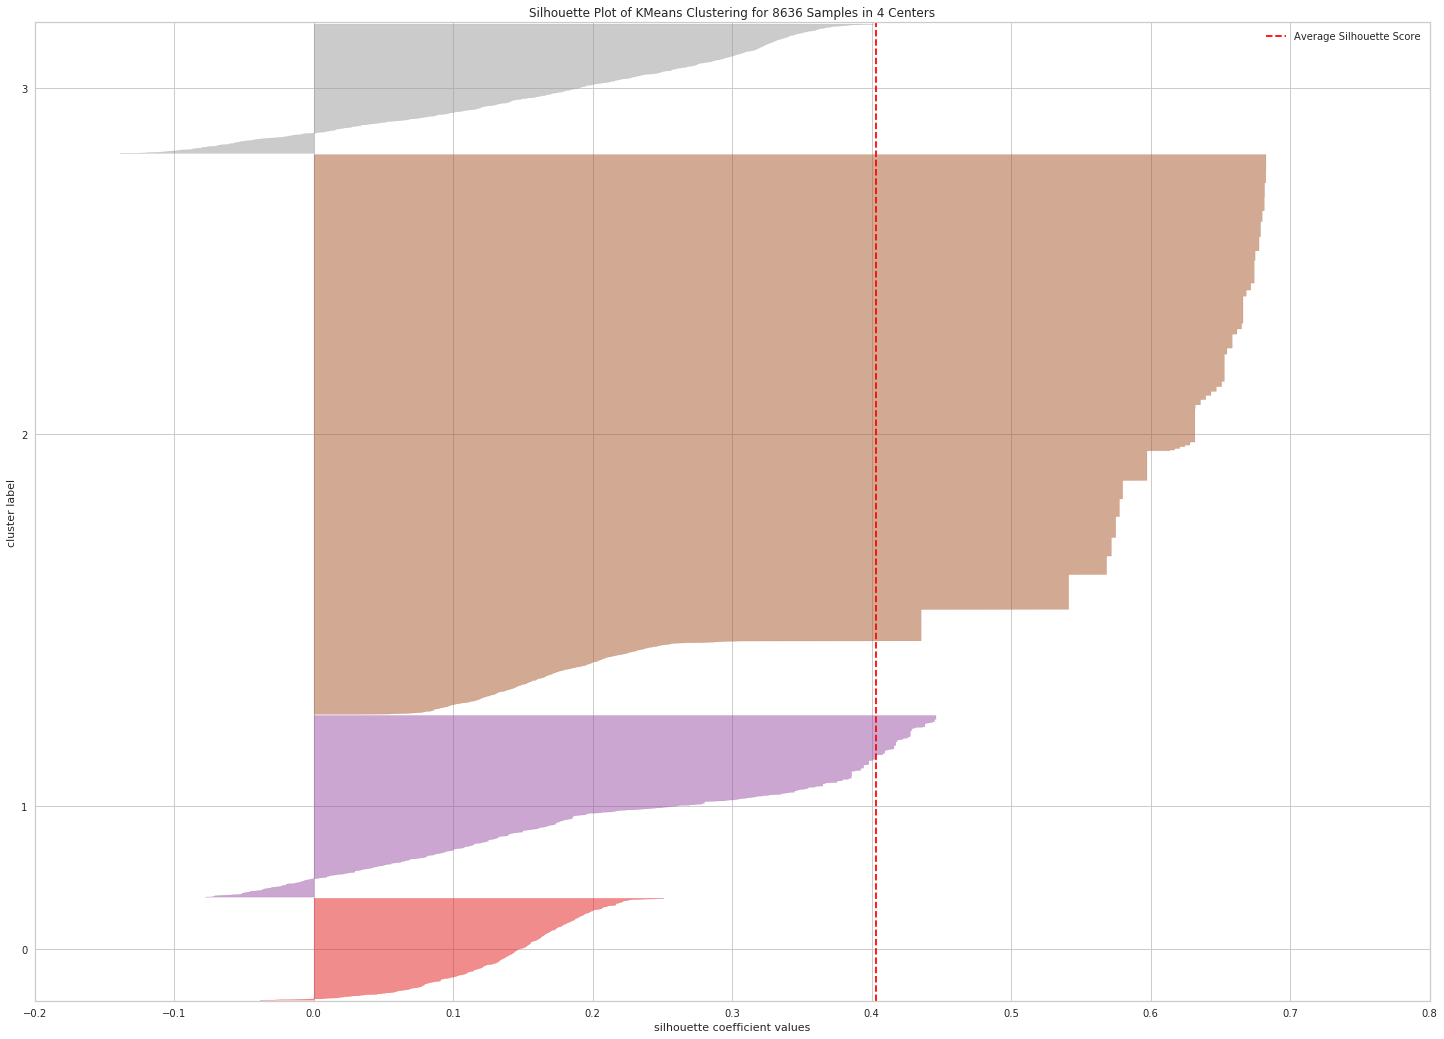

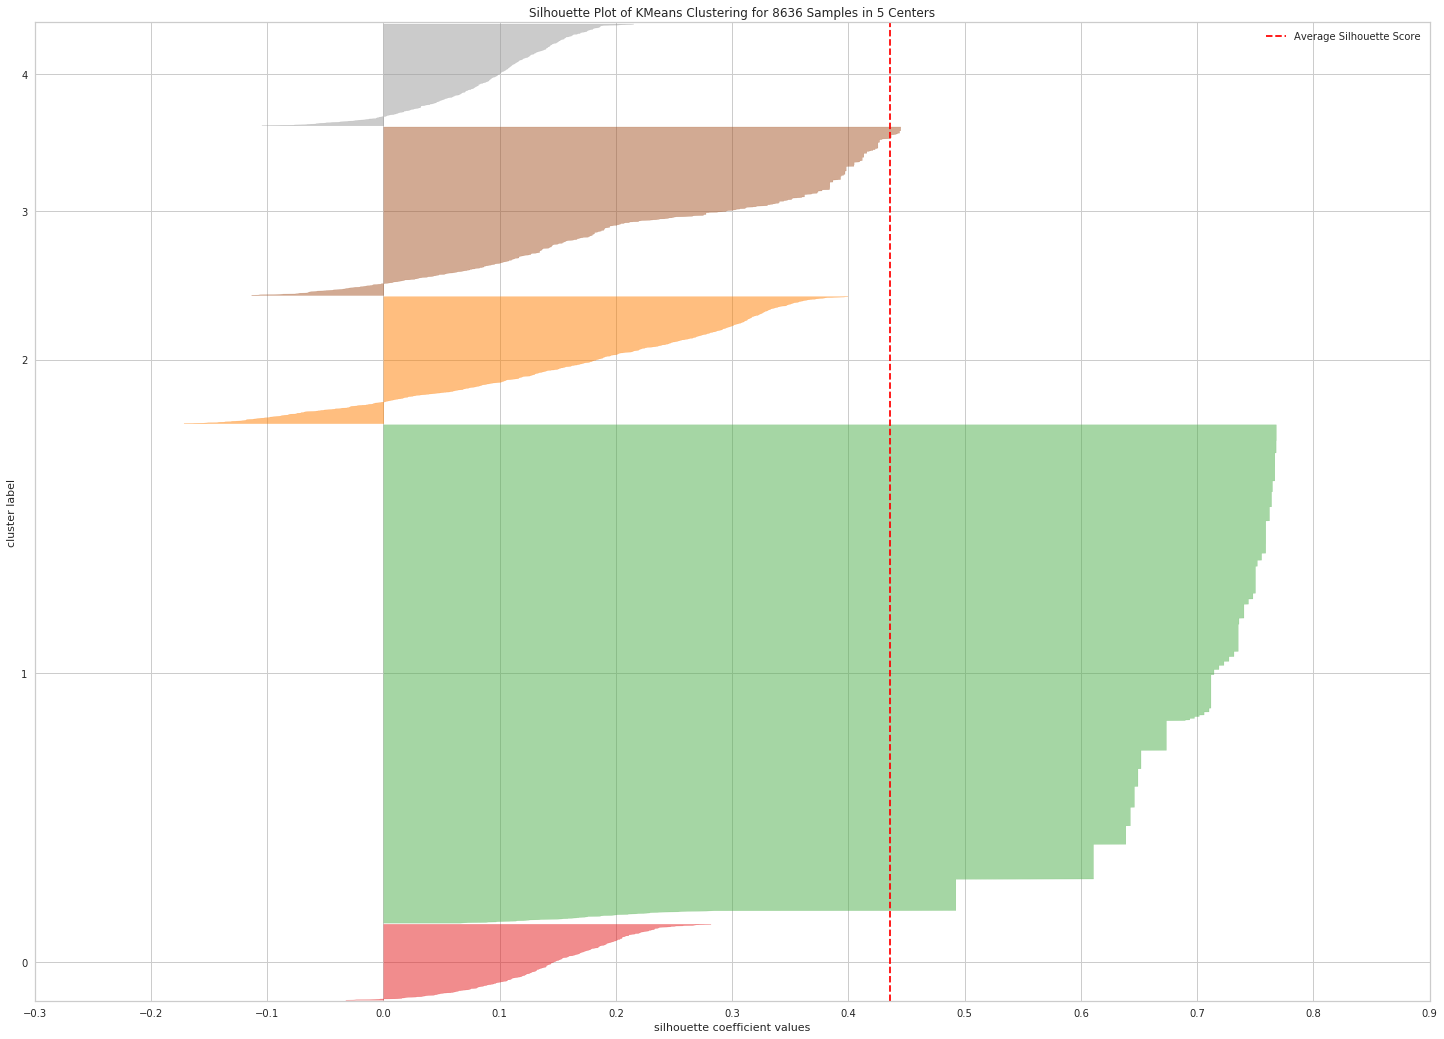

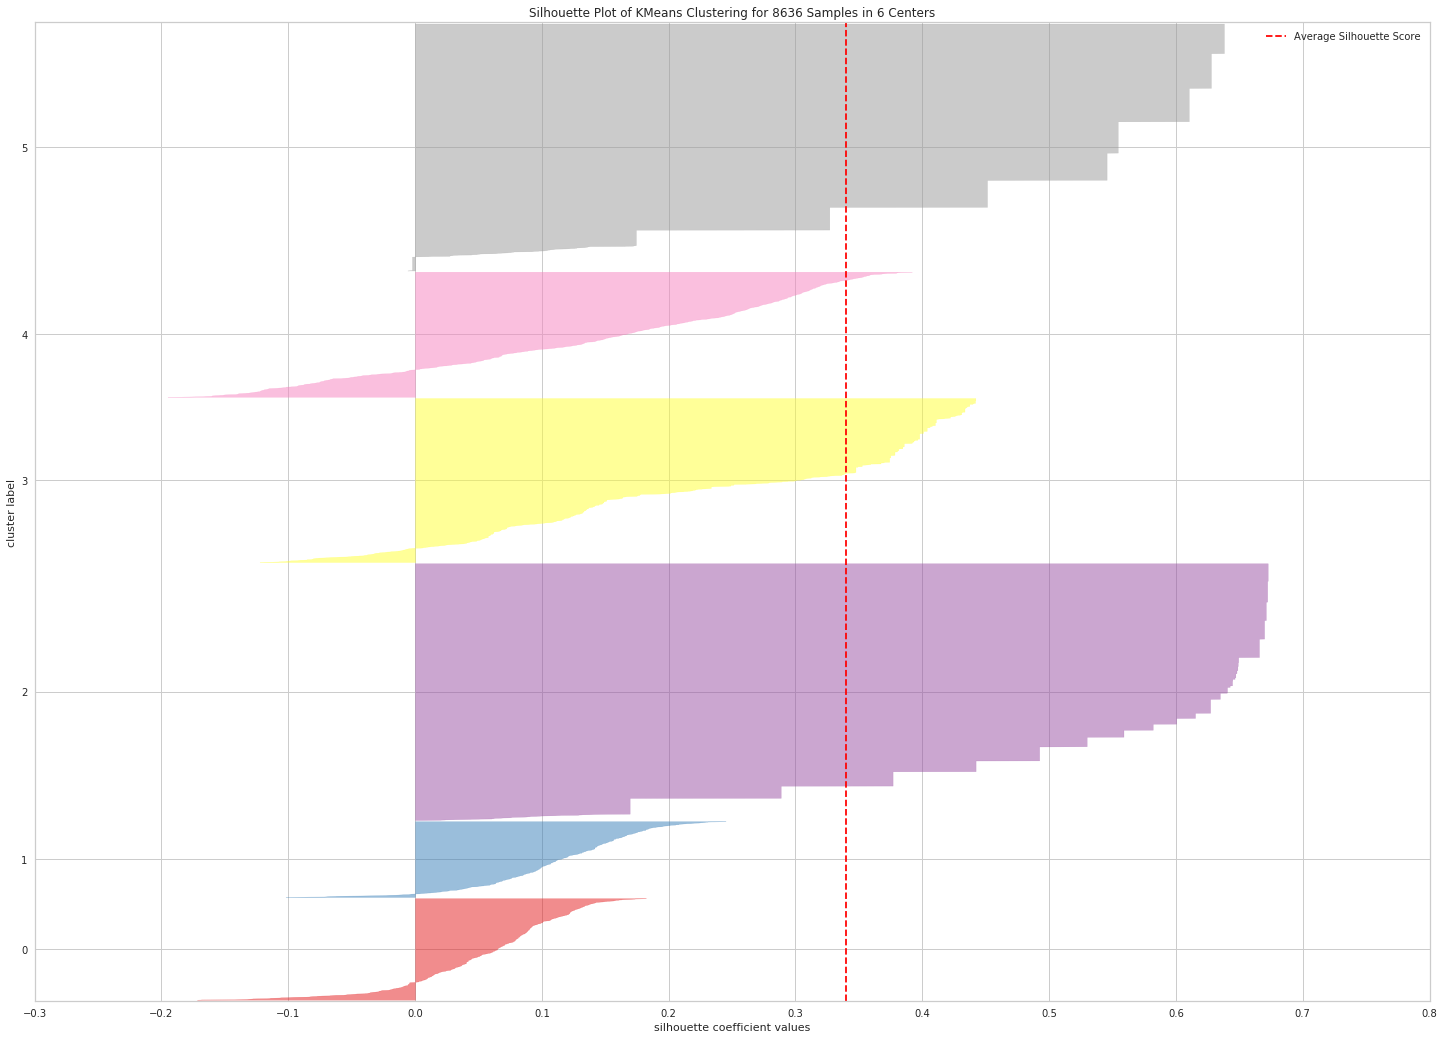

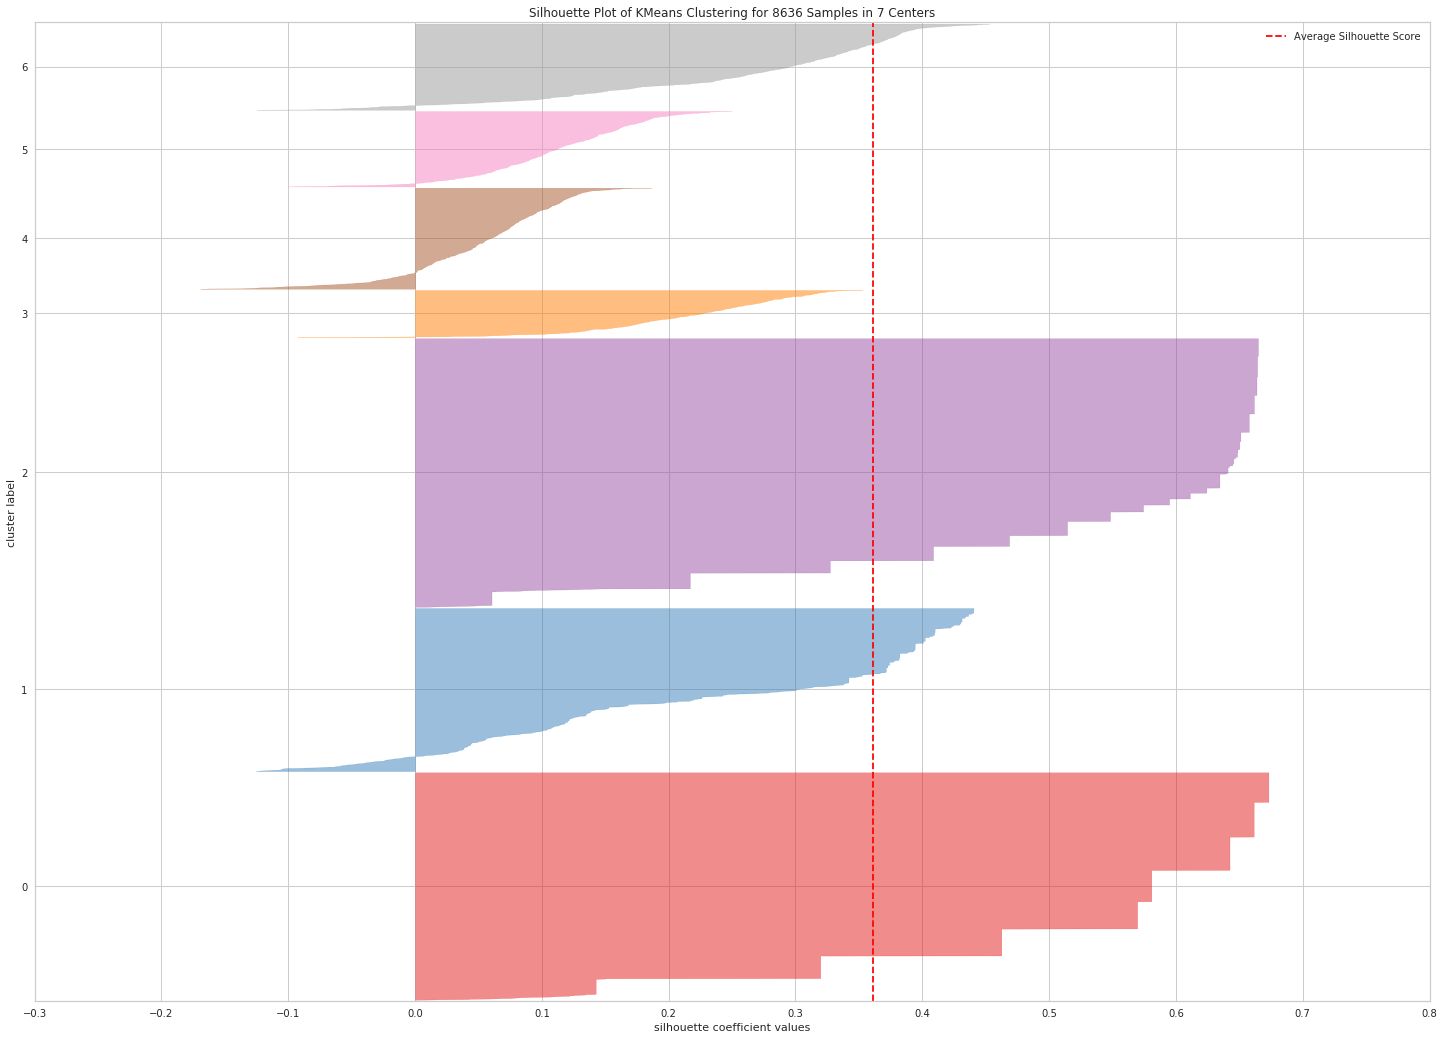

In [93]:
# METHOD 3 : silhouette visualiser

s = np.array(pca_data)

for i in range(2,8):
    silhouette_visualizer(KMeans(n_clusters = i),s)

- As seen in the above diagrams, we can't determine a good cluster number as their are outliers present and the distribution of data is highly uneven.

In [102]:
# FOR DATA WITHOUT OUTLIERS.

wcss1 = []

for i in range(2,8):
    km = KMeans(n_clusters = i)
    km.fit(pca_wo)
    wcss1.append(km.inertia_)
wcss1

[1787.91505158777,
 881.826376257527,
 387.7410689416564,
 225.01174576168512,
 128.06891906107128,
 80.69955600337592]

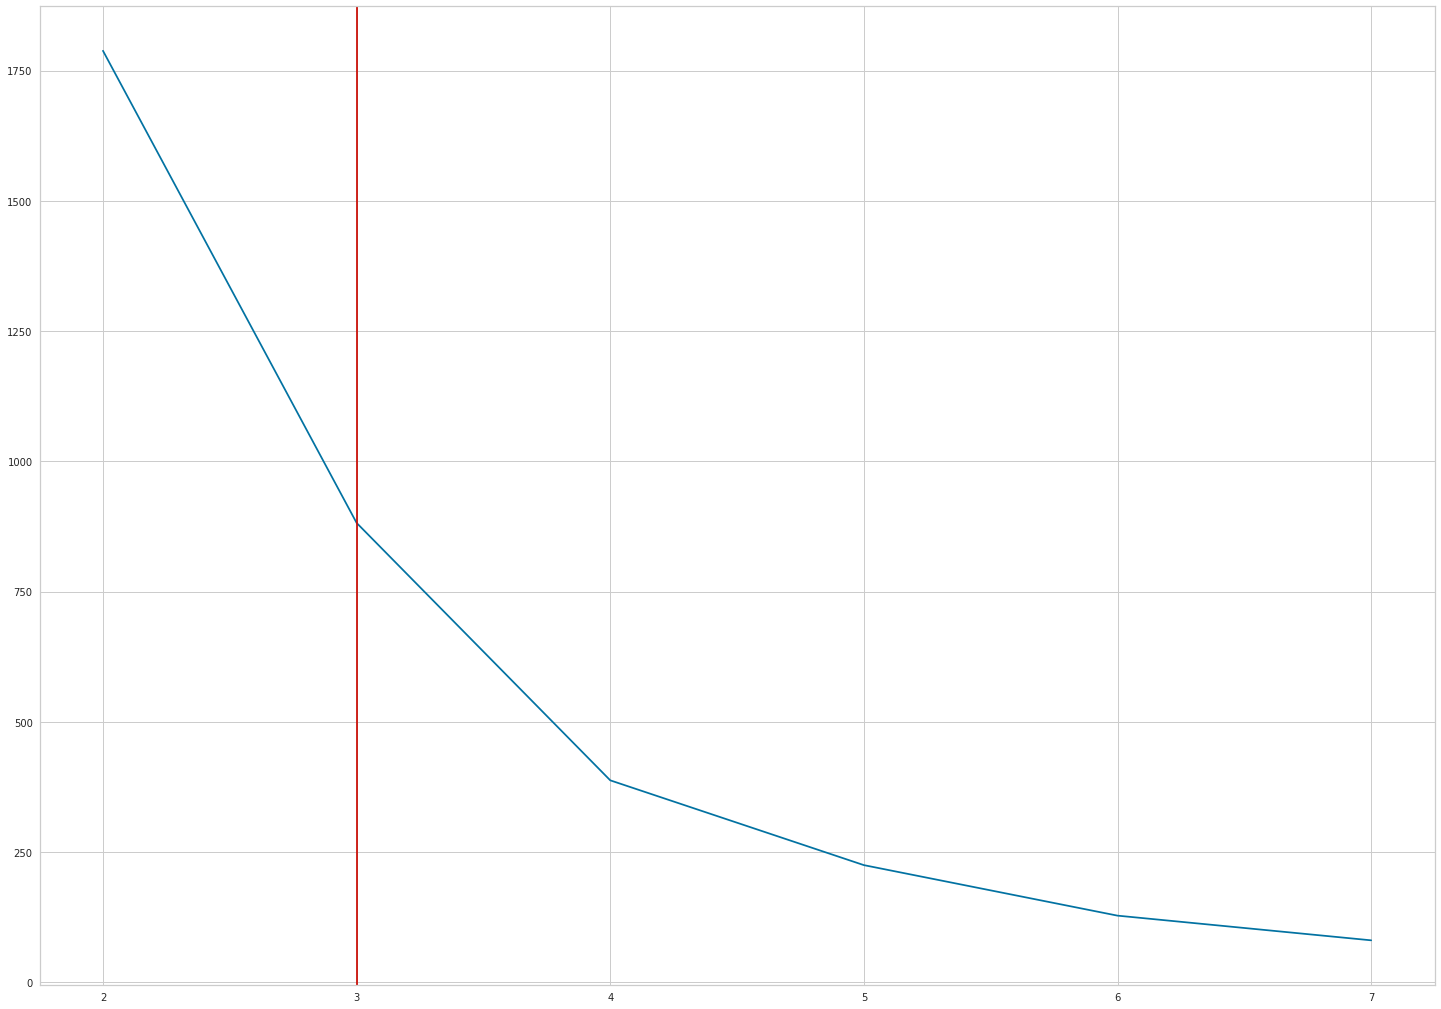

In [103]:
plt.plot(range(2,8),wcss1)
plt.axvline(x = 3, color = 'r')
plt.show()

In [104]:
# METHOD 2 : silhouette score

silhouette1 = []

for i in range(2,8):
    km = KMeans(n_clusters = i,random_state = 1)
    km.fit(pca_wo)
    cluster_num1 = km.labels_
    score1 = silhouette_score(pca_wo,cluster_num1)
    silhouette1.append(score1)
    print('For {} clusters the silhouette score is {}.'.format(i,score1))

For 2 clusters the silhouette score is 0.5713226478044652.
For 3 clusters the silhouette score is 0.596780512615636.
For 4 clusters the silhouette score is 0.651884504296053.
For 5 clusters the silhouette score is 0.6475516552601339.
For 6 clusters the silhouette score is 0.6858259543581564.
For 7 clusters the silhouette score is 0.7179441111462623.


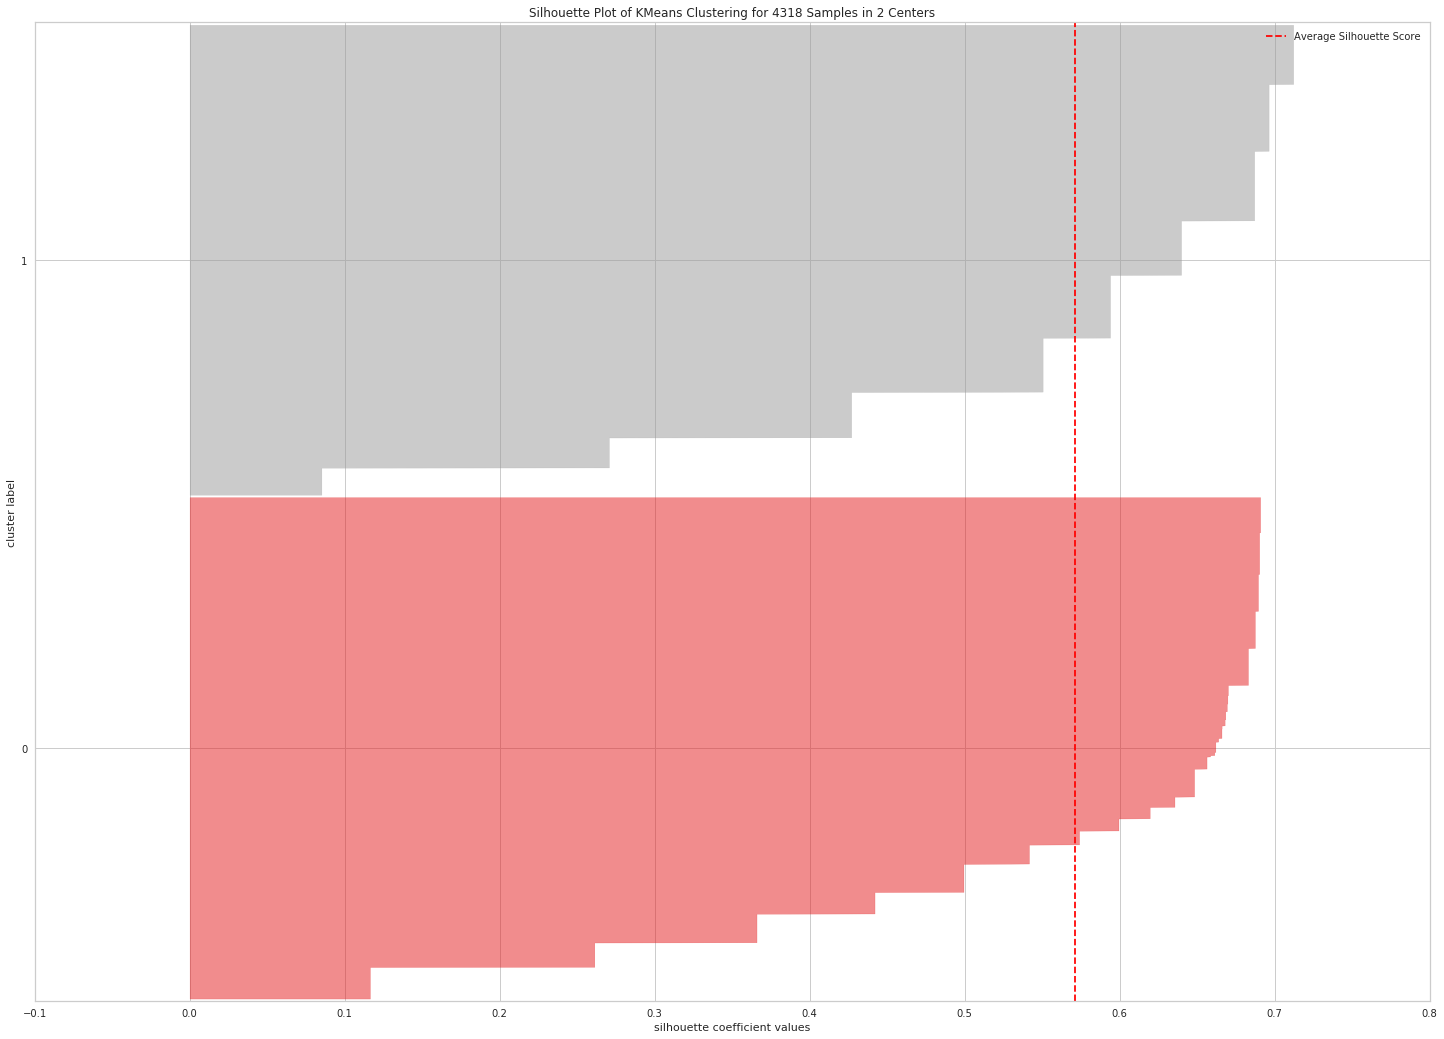

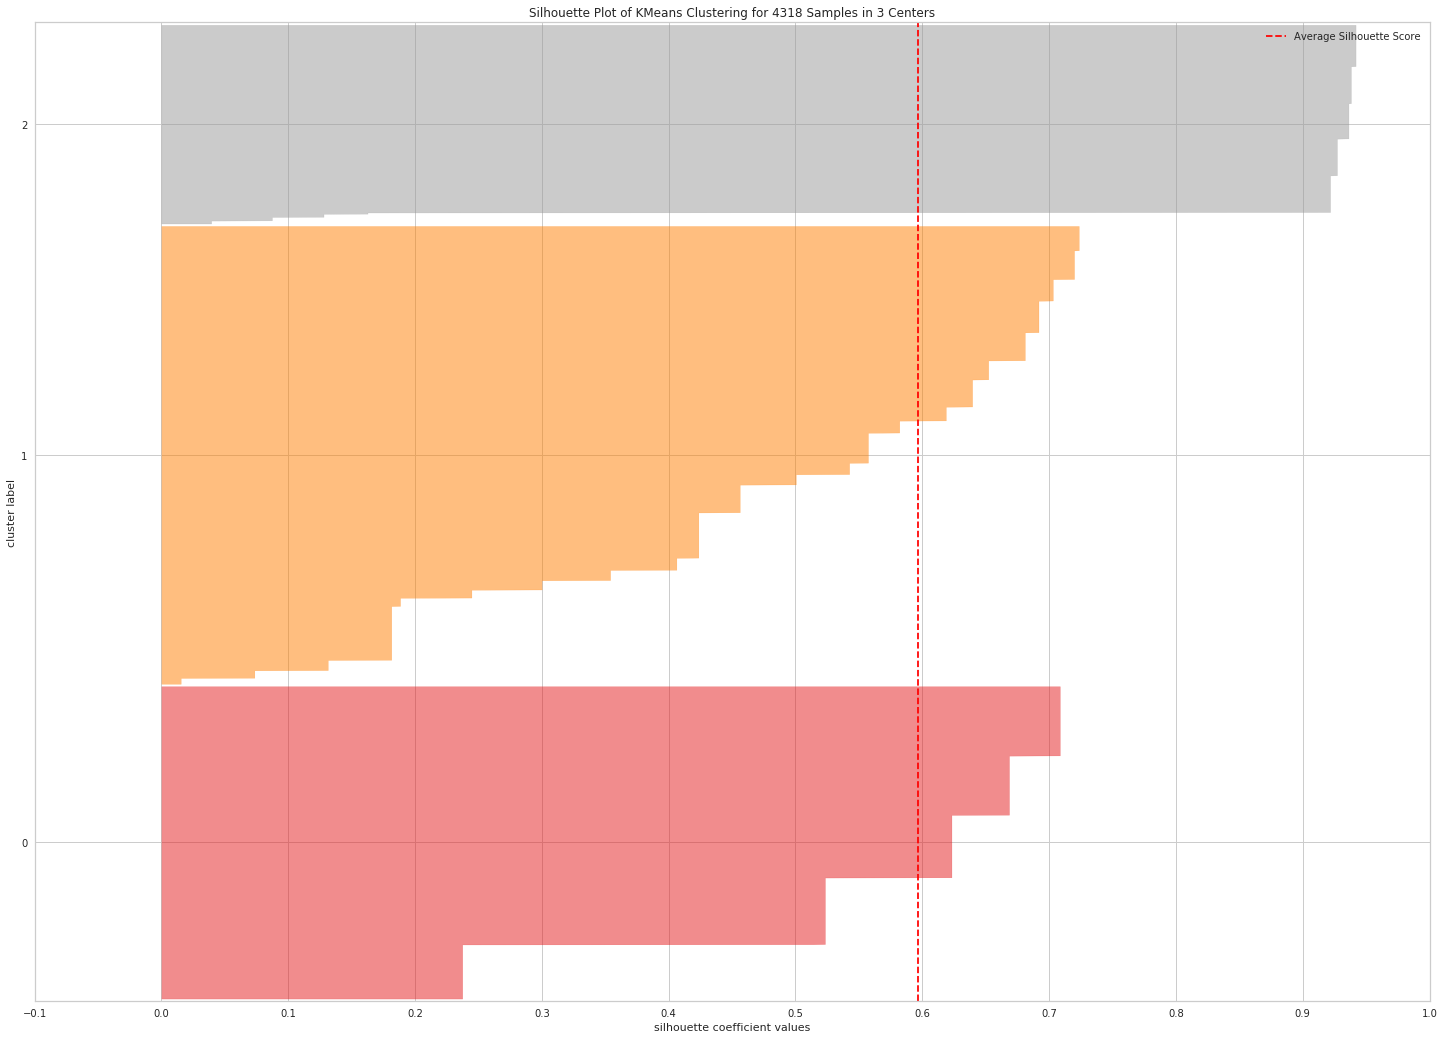

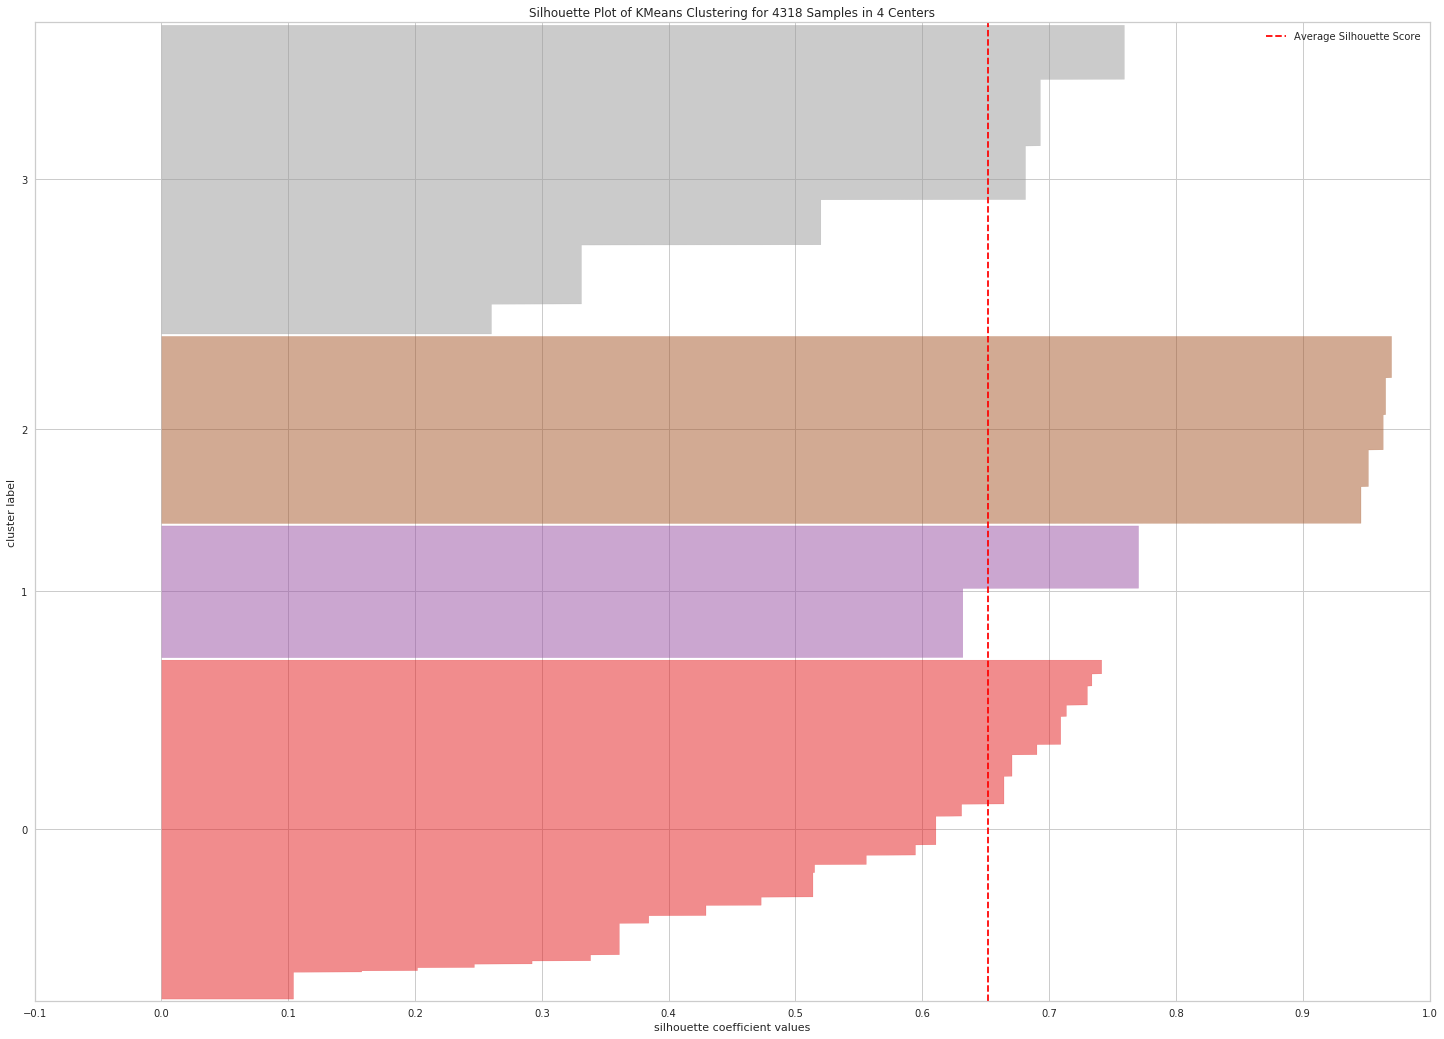

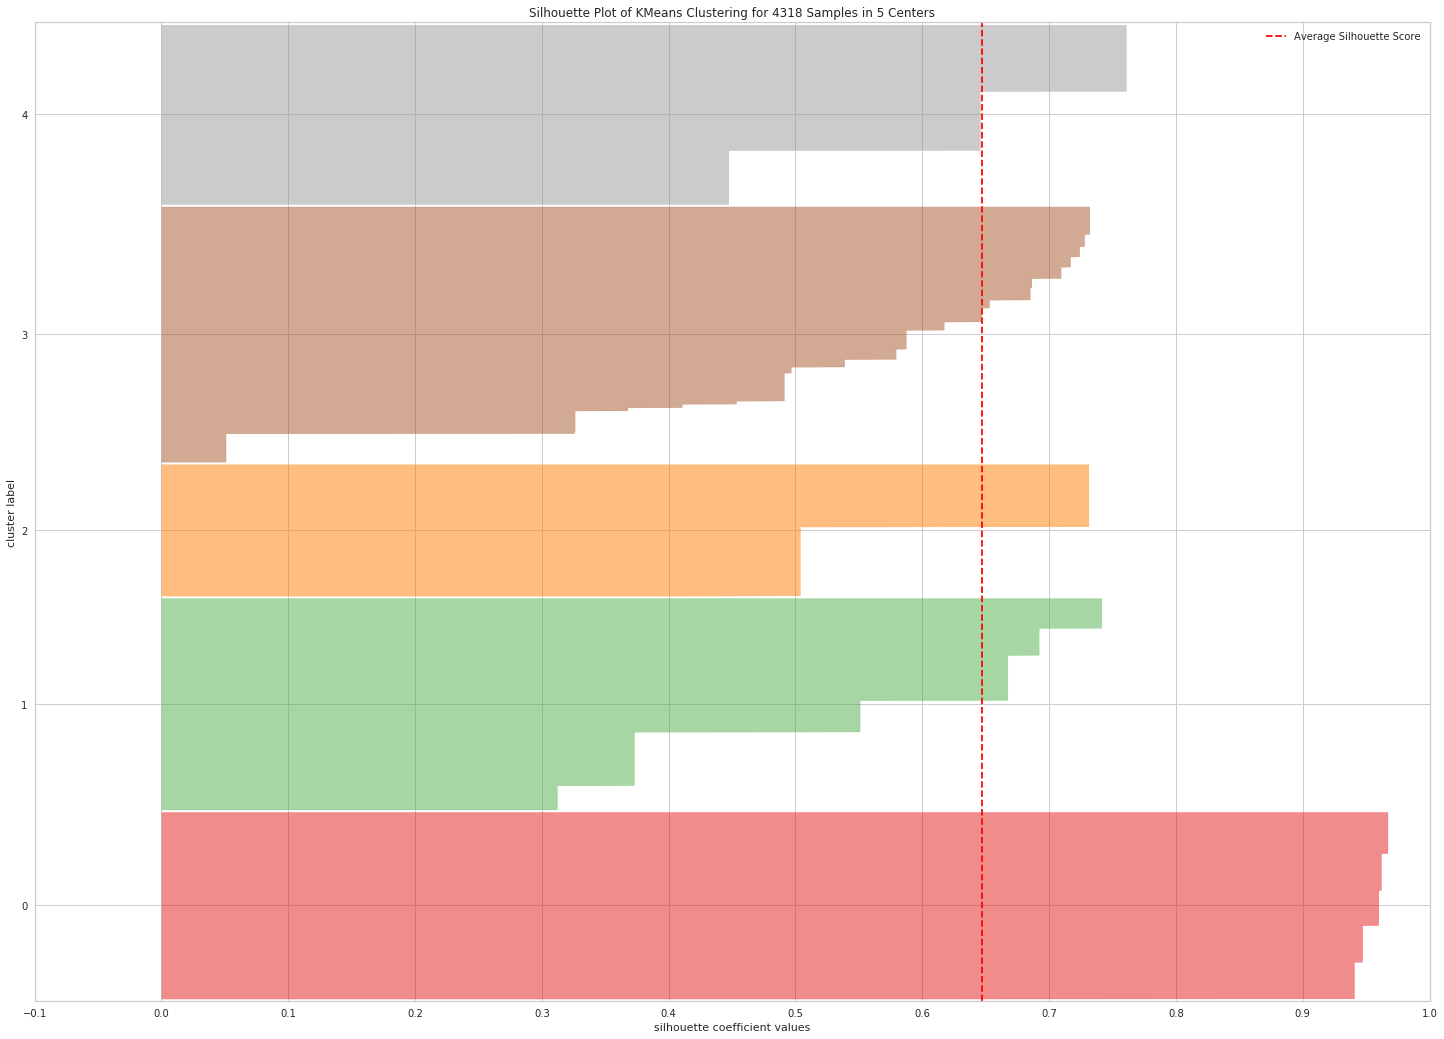

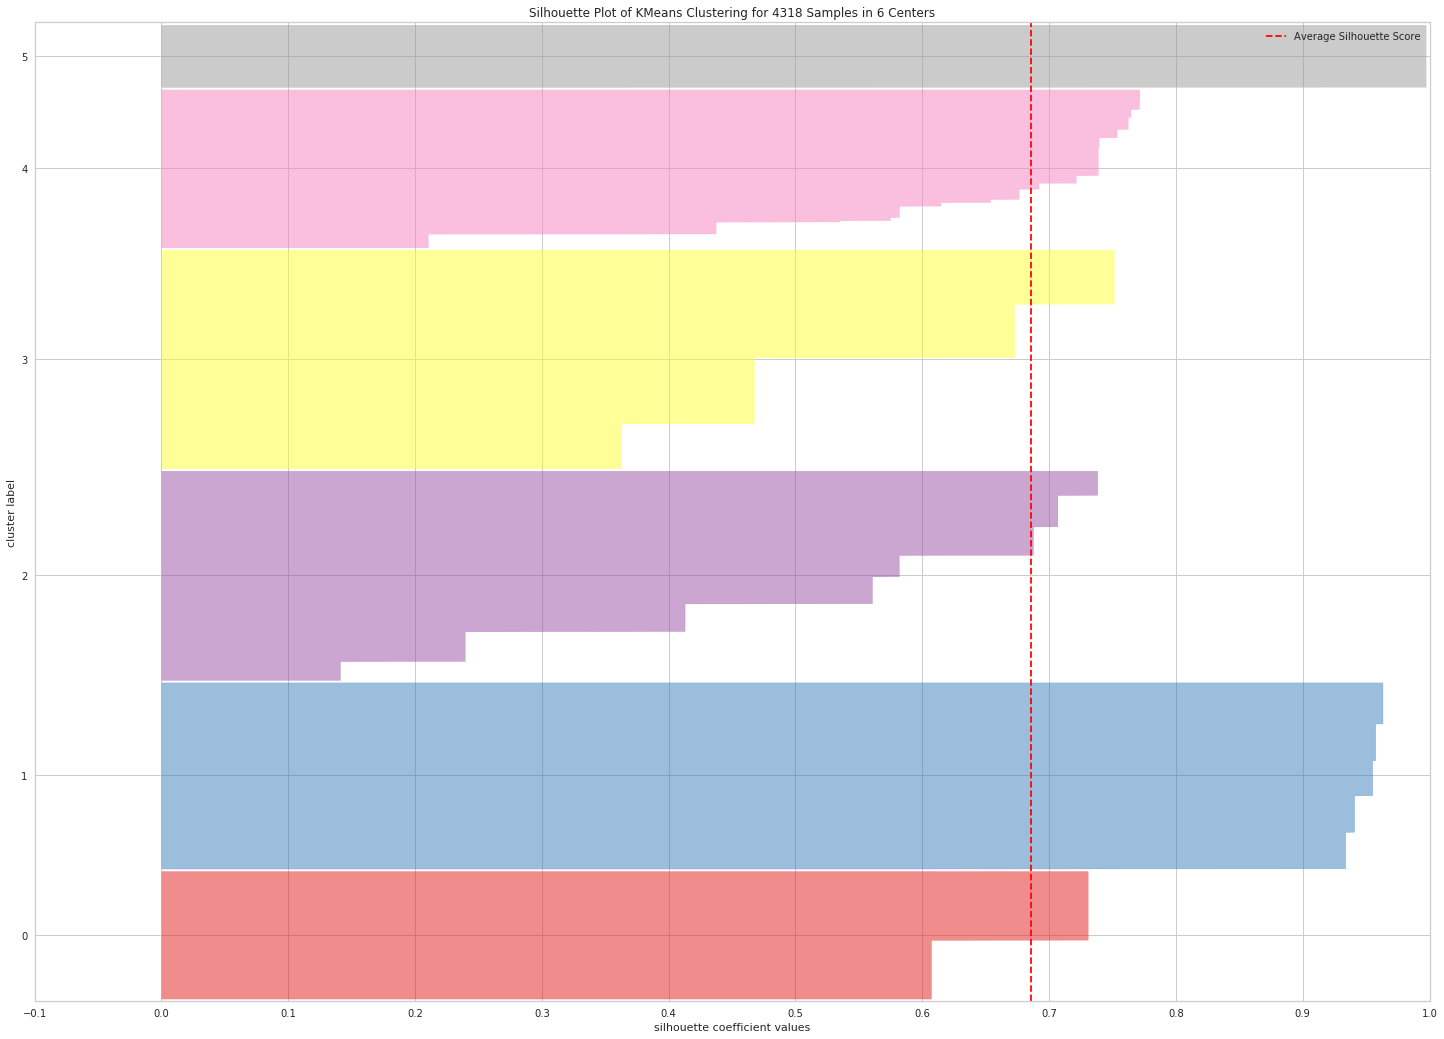

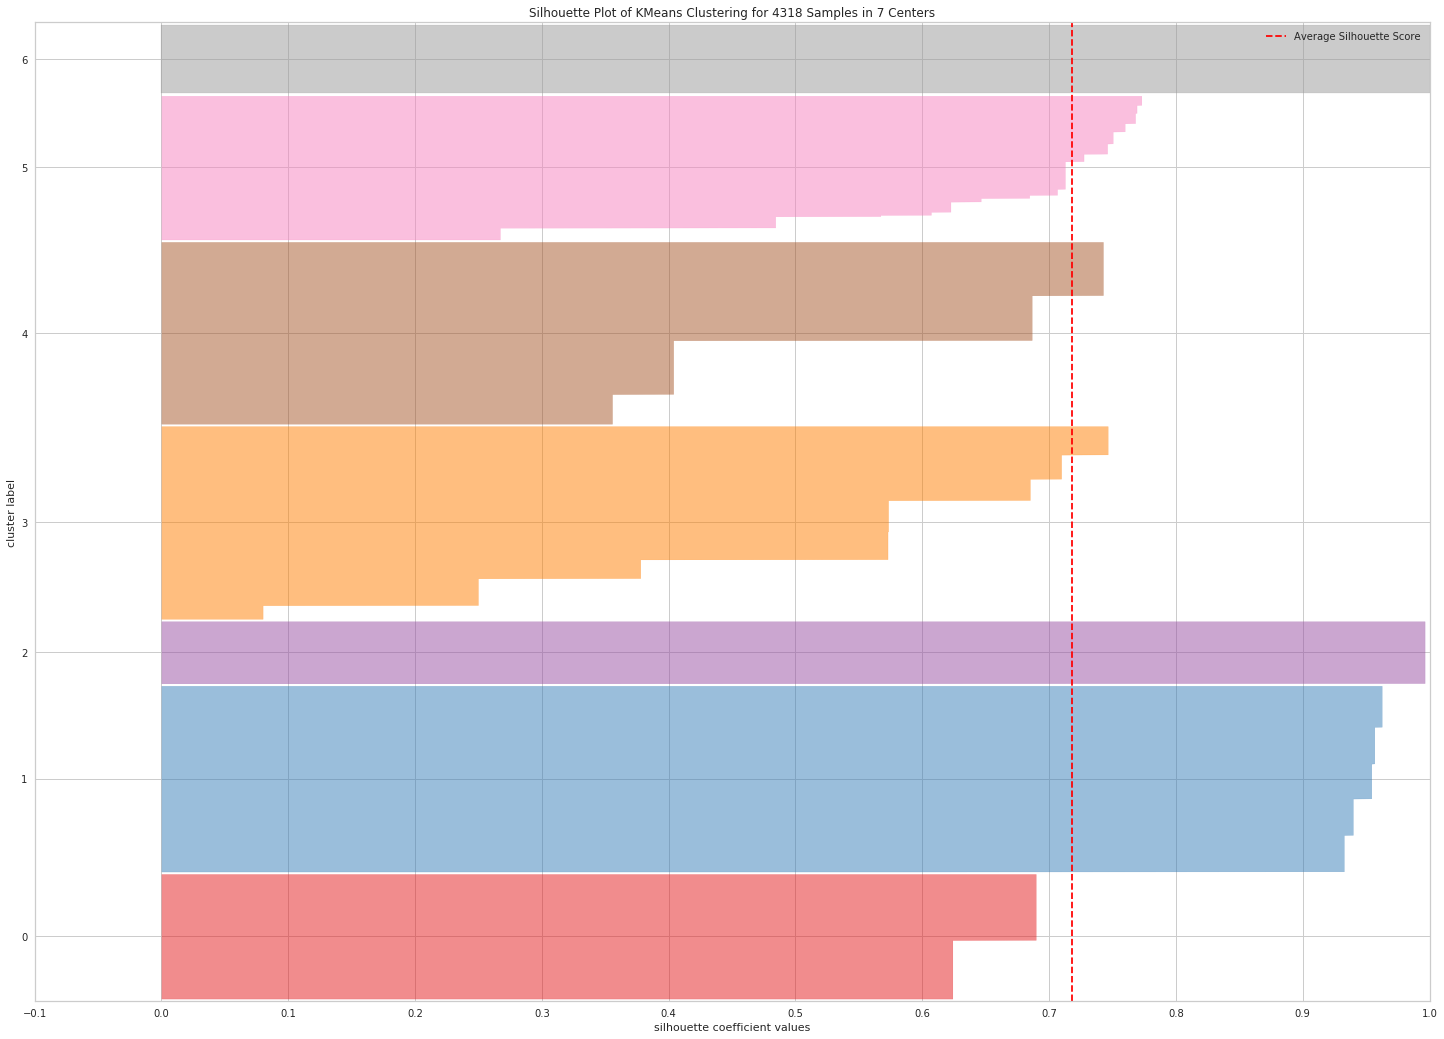

In [106]:
# METHOD 3 : silhouette visualiser

s = np.array(pca_wo)

for i in range(2,8):
    silhouette_visualizer(KMeans(n_clusters = i),s)

- Looking at all the methods above it can be inferred that the best cluster number seems to be 5, Where the datapoints look well distributed without much outliers present and have a good silhoouette score as well.

In [142]:
# Building a model with optimum cluster number

km = KMeans(n_clusters = 5,random_state=1 )

km_model = km.fit(pca_data)
df_scaled['km_clusters'] = km_model.labels_

df_scaled['km_clusters'].value_counts()

0    4429
2    1498
4    1129
1     905
3     675
Name: km_clusters, dtype: int64

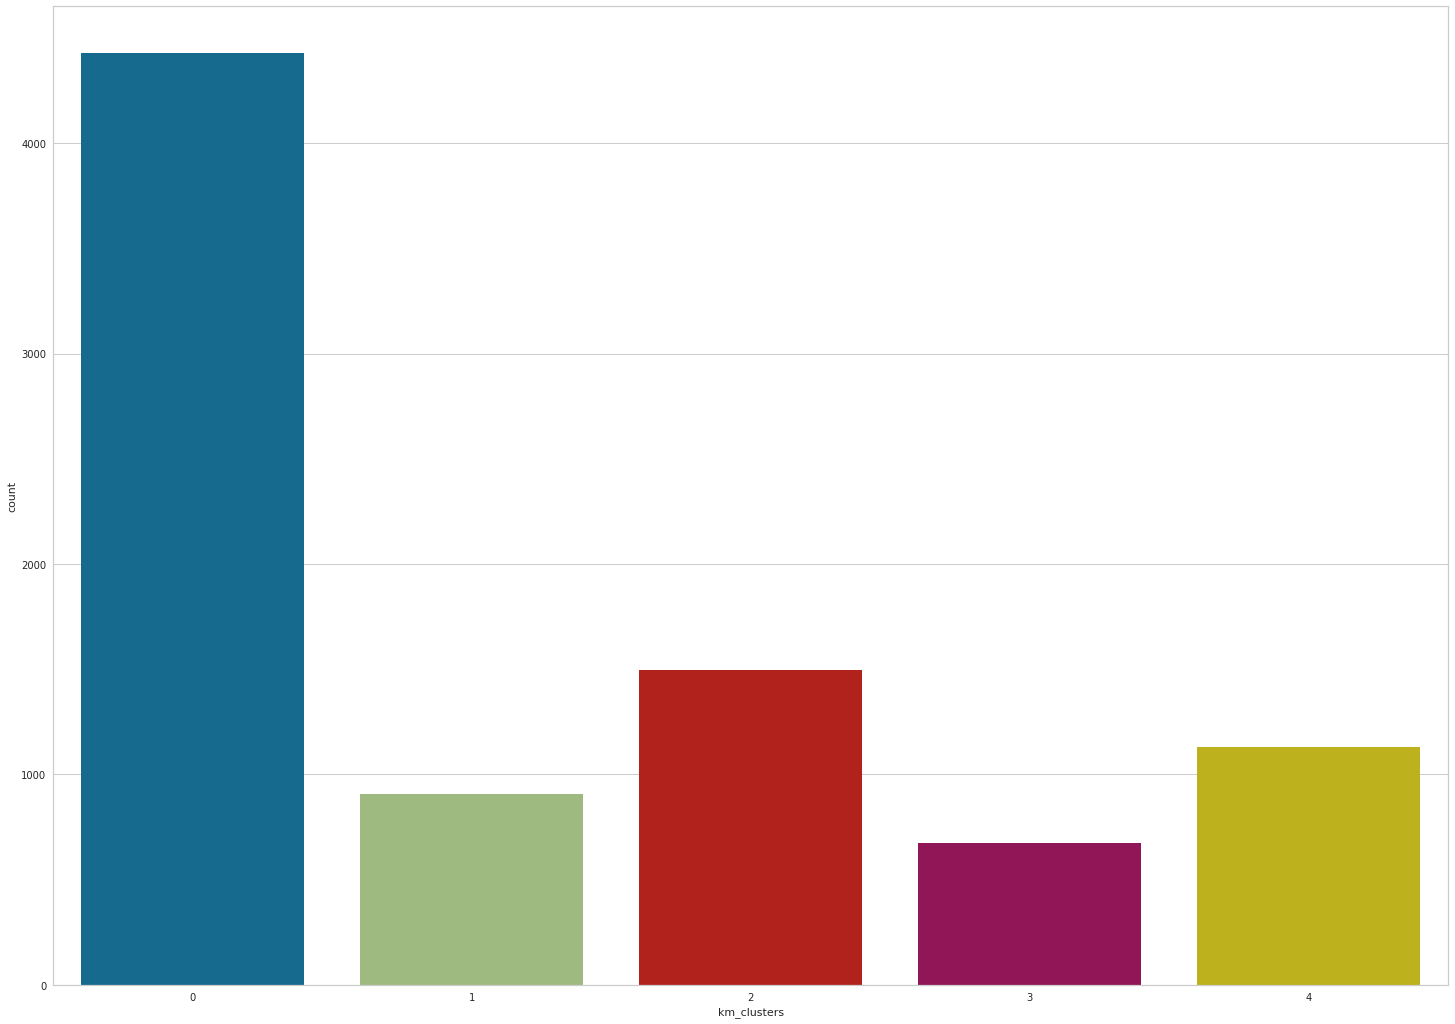

In [143]:
sns.countplot(df_scaled['km_clusters'])

##### Hierarchical Clustering Model (agglomerative clustering) :

- Heirarchical clustering links the model at every feature in comparison with each other forming a cluster.
- The parameters for hierarchical clustering are number of clusters and linkage method.

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


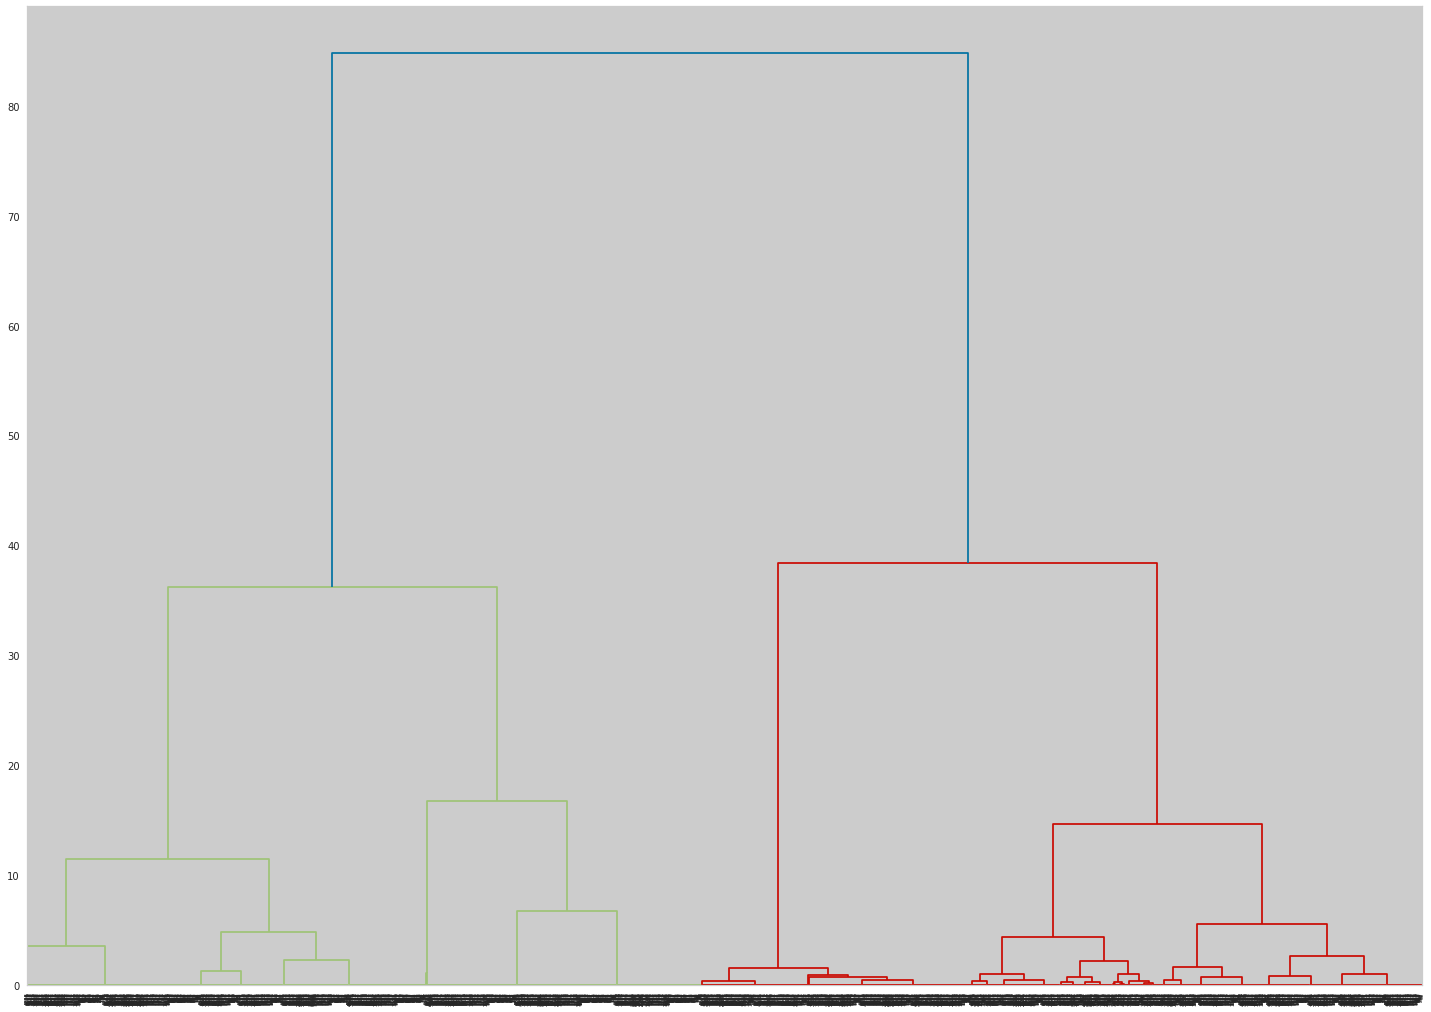

In [121]:
# FOR OPTIMAL CLUSTER NUMBER and LINKAGE METHOD:

# method as ward
link_ward = linkage(pca_data,method='ward')
dendro_ward = dendrogram(link_ward)

In [122]:
pca_wo.shape

(4318, 8)

In [133]:
# cophenet score of linkage method

eucli_dist = euclidean_distances(pca_wo)
dist_array = np.triu(eucli_dist,[4318,k=1])

coeff, cophenet_ward = cophenet(link_ward,dist_array)
print('Cophenet score of ward link :',cophenet_ward)


SyntaxError: invalid syntax (<ipython-input-133-a2c6bcddd46c>, line 4)

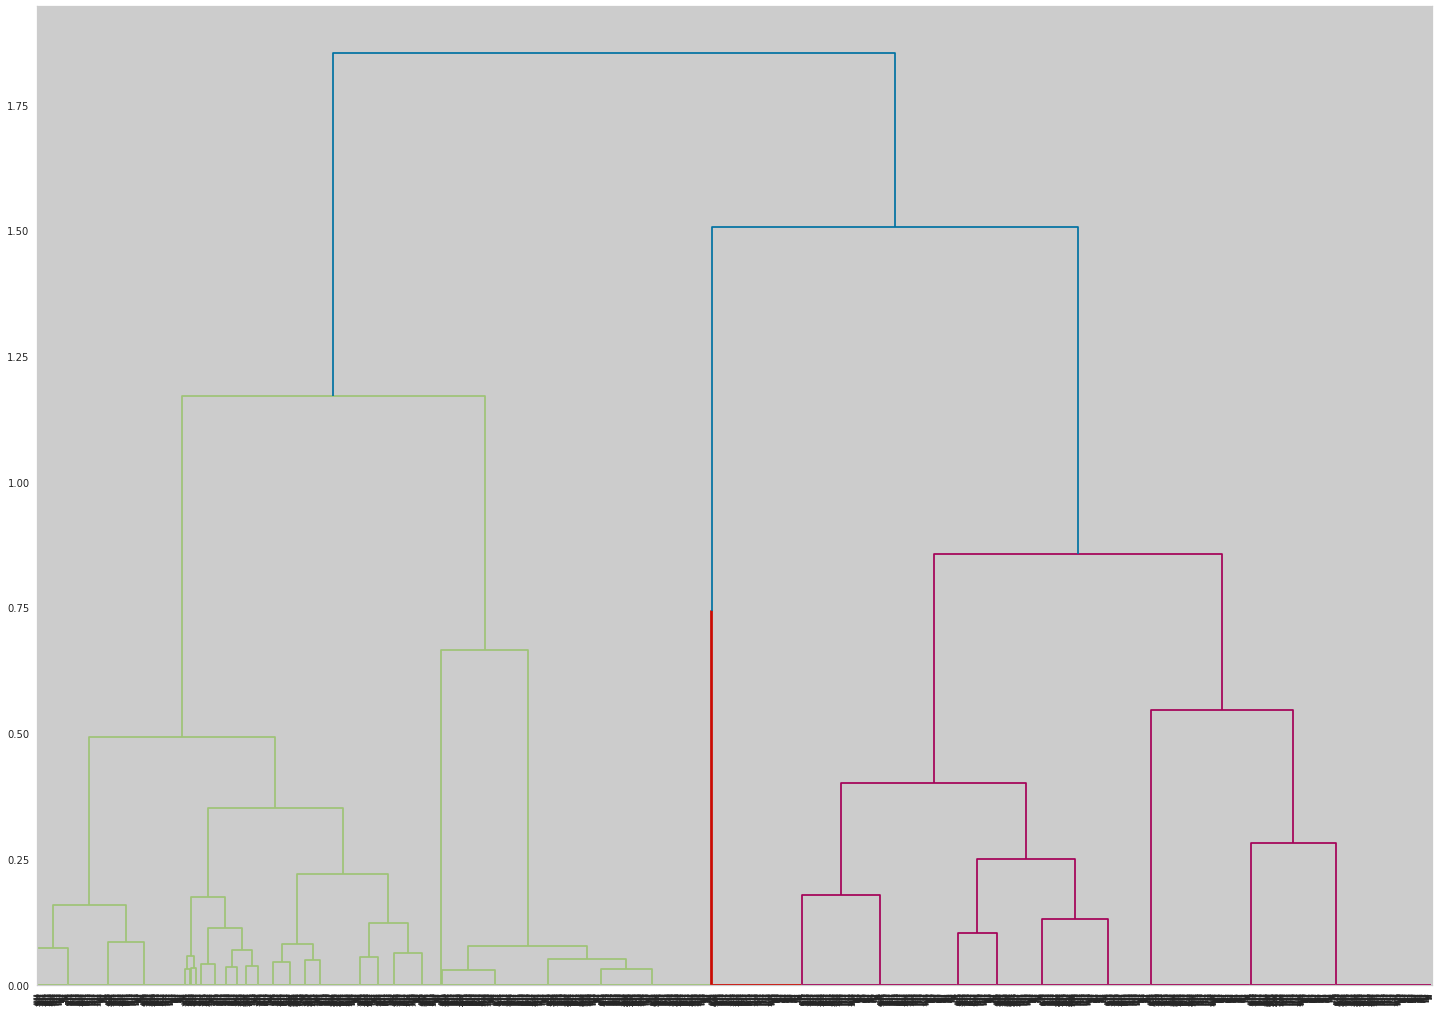

In [128]:
# method as average
link_avg = linkage(pca_data,method='average')
dendro_avg = dendrogram(link_avg)

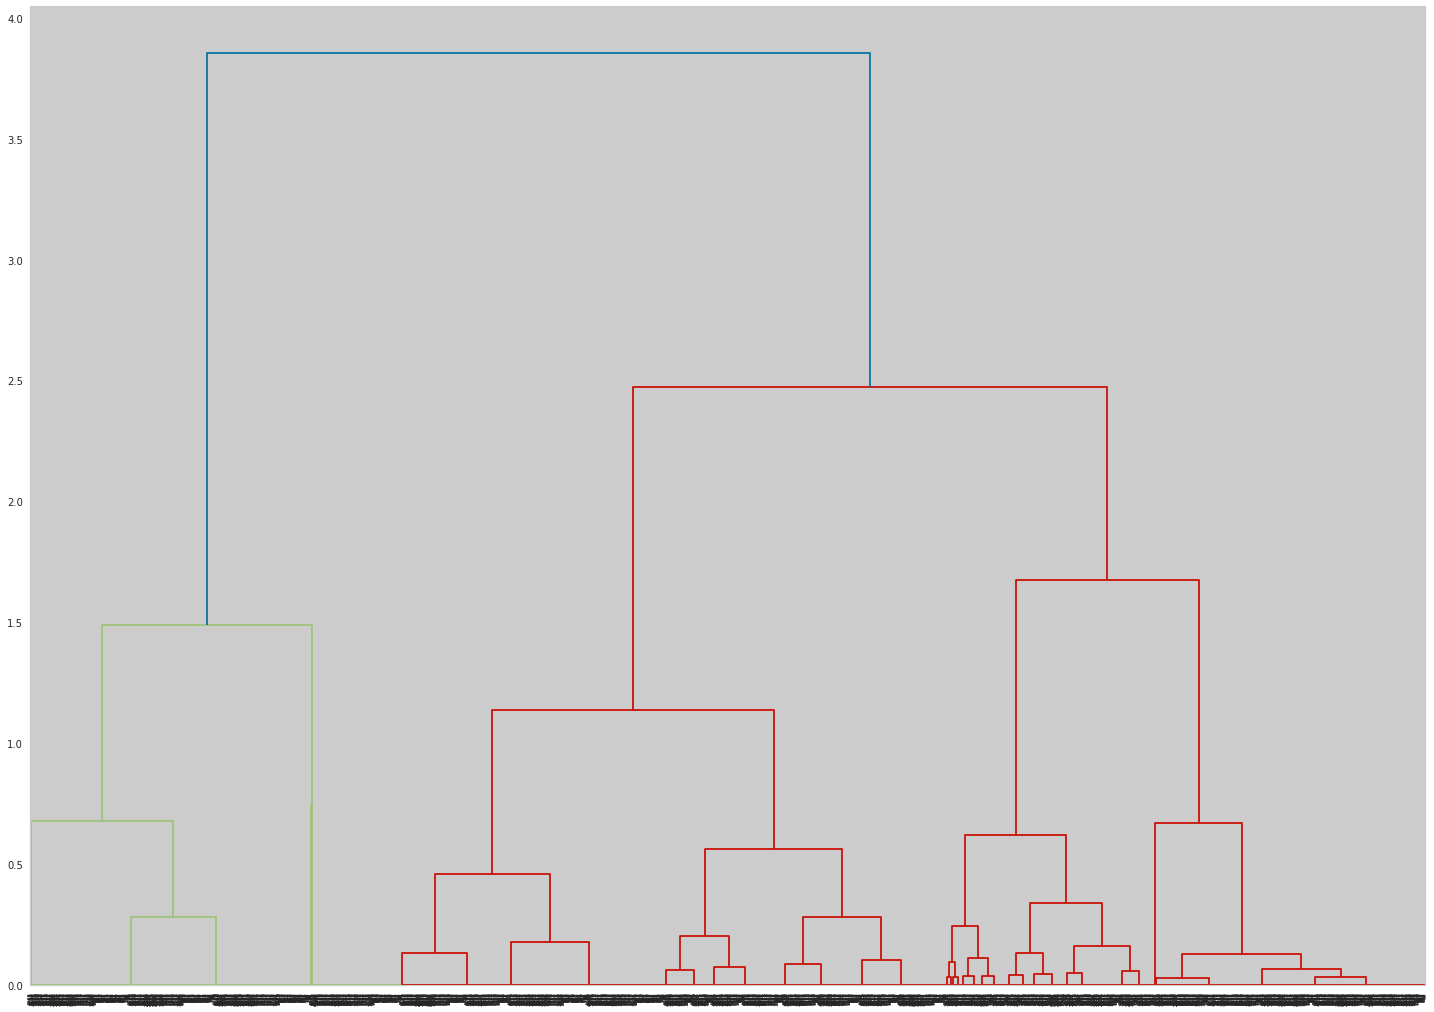

In [134]:
# method as complete
link_com = linkage(pca_data,method='complete')
dendro_com = dendrogram(link_com)

- From the dendrogram plotted it can be observed that 2 seems to be the best cluster number with linkage ward.

In [145]:
# Plotting a hierarchical clustering model

hac = AgglomerativeClustering(n_clusters=2,linkage='ward')

hac_model = hac.fit(pca_wo)

df_outliers['hac_clusters'] = hac_model.labels_

df_outliers['hac_clusters'].value_counts()

0    7444
1    1192
Name: hac_clusters, dtype: int64

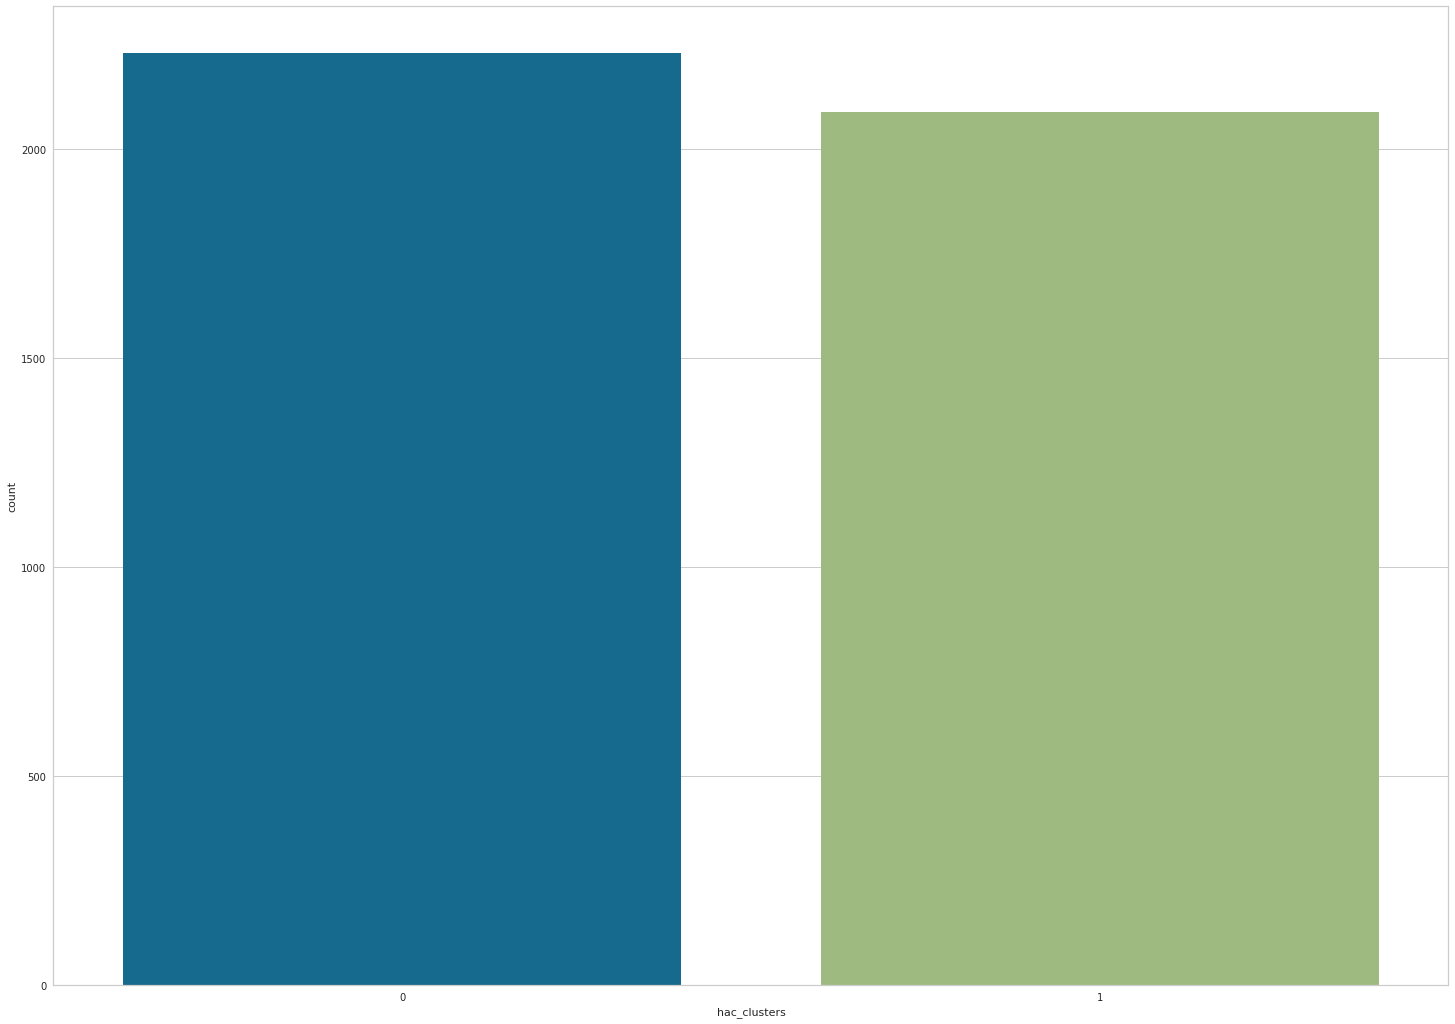

In [160]:
sns.countplot(df_outliers['hac_clusters'])

- Since the number of clusters has been determined as 2 as their isn't much interpretation 

Cluster Profilling for KMeans model :

##### For cluster 1 :

In [149]:
df_scaled[df_scaled['km_clusters']==0].describe()

,Total_Sale,STD_Sales,Hist_Visits,W1_Min_Sale,W1_Visits,W2_Min_Sale,W2_Visits,W3_Sale,W3_Max_Sale,W3_Min_Sale,...,W4_Visits,W5_Visits,week_1,week_2,week_3,week_4,APV,Days_since_last_visit,km_clusters,hac_clusters
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,...,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,4429.0,4429.000000
mean,0.055459,0.466135,0.177026,0.048380,0.021220,-0.082486,-0.116462,0.030883,0.057616,0.057616,...,0.062622,-0.179581,-0.002651,-0.107870,0.199039,0.308773,-0.195087,-0.076777,0.0,0.014676
std,0.674413,0.959012,0.264789,1.066612,1.047299,1.018756,0.890026,0.837022,0.861414,0.861414,...,0.684243,0.558184,1.004126,0.985624,0.990092,0.998824,1.052201,0.978743,0.0,0.120266
min,-0.757587,-0.876941,-0.546447,-0.848168,-0.747856,-0.876017,-0.769351,-0.955547,-0.957848,-0.957848,...,-0.747075,-0.272191,-0.859259,-0.888106,-0.972585,-0.873183,-1.388985,-2.111734,0.0,0.000000
25%,-0.428336,-0.876941,0.091150,-0.848168,-0.747856,-0.876017,-0.769351,-0.955547,-0.957848,-0.957848,...,-0.747075,-0.272191,-0.859259,-0.888106,-0.972585,-0.873183,-0.871612,-0.770820,0.0,0.000000
50%,-0.172623,0.737098,0.091150,-0.848168,-0.747856,-0.876017,-0.769351,0.632680,0.685356,0.685356,...,0.635639,-0.272191,-0.859259,-0.888106,1.028188,1.145235,-0.530062,0.507668,0.0,0.000000
75%,0.543675,1.209042,0.091150,1.314449,0.723996,0.987139,0.680064,0.769503,0.802799,0.802799,...,0.635639,-0.272191,1.163794,1.125992,1.028188,1.145235,0.456964,0.761126,0.0,0.000000
max,1.750412,2.189058,1.331440,1.894908,5.139551,1.795648,2.129479,0.906959,0.894240,0.894240,...,0.635639,3.154403,1.163794,1.125992,1.028188,1.145235,2.575412,0.833126,0.0,1.000000


In [150]:
df_scaled[df_scaled['km_clusters']==0].describe(include = 'object')

,Customer_Value,Visitors_Type
count,4318,4318
unique,2,3
top,Regular,Regular_Visitors
freq,4317,3481


##### for cluster 2:

In [151]:
df_scaled[df_scaled['km_clusters']==1].describe()

,Total_Sale,STD_Sales,Hist_Visits,W1_Min_Sale,W1_Visits,W2_Min_Sale,W2_Visits,W3_Sale,W3_Max_Sale,W3_Min_Sale,...,W4_Visits,W5_Visits,week_1,week_2,week_3,week_4,APV,Days_since_last_visit,km_clusters,hac_clusters
count,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,...,9.050000e+02,905.000000,905.000000,905.000000,9.050000e+02,9.050000e+02,905.000000,905.000000,905.0,905.0
mean,0.170881,0.224032,0.168600,0.127674,0.097849,0.030754,-0.007007,0.957572,0.988485,0.988485,...,-7.470755e-01,-0.048800,0.139973,0.026584,1.028188e+00,-8.731832e-01,0.015227,-0.251966,1.0,0.0
std,0.736941,1.021657,0.568793,1.002850,0.975648,1.009100,0.949124,0.250968,0.246191,0.246191,...,5.554185e-15,0.905686,1.012011,1.003359,1.910639e-14,7.442607e-15,0.989151,0.881073,0.0,0.0
min,-1.428180,-0.876941,-0.546447,-0.848168,-0.747856,-0.876017,-0.769351,0.473798,0.520975,0.520975,...,-7.470755e-01,-0.272191,-0.859259,-0.888106,1.028188e+00,-8.731832e-01,-2.113136,-2.111734,1.0,0.0
25%,-0.381574,-0.876941,-0.546447,-0.848168,-0.747856,-0.876017,-0.769351,0.834574,0.802799,0.802799,...,-7.470755e-01,-0.272191,-0.859259,-0.888106,1.028188e+00,-8.731832e-01,-0.727253,-0.770820,1.0,0.0
50%,0.157369,0.492132,0.091150,-0.848168,-0.747856,-0.876017,-0.769351,0.834574,0.894240,0.894240,...,-7.470755e-01,-0.272191,-0.859259,-0.888106,1.028188e+00,-8.731832e-01,-0.138875,-0.100363,1.0,0.0
75%,0.622922,1.181582,0.585708,1.025735,0.723996,0.987139,0.680064,1.110380,1.179592,1.179592,...,-7.470755e-01,-0.272191,1.163794,1.125992,1.028188e+00,-8.731832e-01,0.788279,0.570094,1.0,0.0
max,2.007072,2.295329,2.121947,1.838908,6.611403,1.795648,5.028309,1.703077,1.753294,1.753294,...,-7.470755e-01,6.580998,1.163794,1.125992,1.028188e+00,-8.731832e-01,2.830494,0.833126,1.0,0.0


In [152]:
df_scaled[df_scaled['km_clusters']==1].describe(include = 'object')

,Customer_Value,Visitors_Type
count,0,0
unique,0,0
top,NaN,NaN
freq,NaN,NaN


##### For cluster 3 :

In [153]:
df_scaled[df_scaled['km_clusters']==2].describe()

,Total_Sale,STD_Sales,Hist_Visits,W1_Min_Sale,W1_Visits,W2_Min_Sale,W2_Visits,W3_Sale,W3_Max_Sale,W3_Min_Sale,...,W4_Visits,W5_Visits,week_1,week_2,week_3,week_4,APV,Days_since_last_visit,km_clusters,hac_clusters
count,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1.498000e+03,1.498000e+03,1.498000e+03,...,1.498000e+03,1498.000000,1498.000000,1498.000000,1498.000000,1.498000e+03,1498.000000,1498.000000,1498.0,1498.0
mean,-0.835305,-0.483565,-0.996136,-0.430331,-0.421651,-0.418247,-0.408449,-9.555472e-01,-9.578476e-01,-9.578476e-01,...,-7.470755e-01,-0.086908,-0.424397,-0.406766,-0.972585,-8.731832e-01,-0.142164,0.552096,2.0,0.0
std,0.761821,0.796217,0.534257,0.805945,0.634750,0.823503,0.661828,2.443306e-14,2.054598e-14,2.054598e-14,...,9.662166e-15,0.843071,0.831327,0.859227,0.000000,8.107335e-15,0.991299,0.915343,0.0,0.0
min,-2.463023,-0.876941,-1.445090,-0.848168,-0.747856,-0.876017,-0.769351,-9.555472e-01,-9.578476e-01,-9.578476e-01,...,-7.470755e-01,-0.272191,-0.859259,-0.888106,-0.972585,-8.731832e-01,-2.113136,-2.111734,2.0,0.0
25%,-1.428180,-0.876941,-1.445090,-0.848168,-0.747856,-0.876017,-0.769351,-9.555472e-01,-9.578476e-01,-9.578476e-01,...,-7.470755e-01,-0.272191,-0.859259,-0.888106,-0.972585,-8.731832e-01,-0.871612,0.013564,2.0,0.0
50%,-0.677965,-0.876941,-1.445090,-0.848168,-0.747856,-0.876017,-0.769351,-9.555472e-01,-9.578476e-01,-9.578476e-01,...,-7.470755e-01,-0.272191,-0.859259,-0.888106,-0.972585,-8.731832e-01,-0.468790,1.145333,2.0,0.0
75%,-0.336639,-0.876941,-0.546447,-0.848168,-0.747856,-0.876017,-0.769351,-9.555472e-01,-9.578476e-01,-9.578476e-01,...,-7.470755e-01,-0.272191,-0.859259,-0.888106,-0.972585,-8.731832e-01,0.788279,1.209842,2.0,0.0
max,1.419584,2.295329,0.585708,1.894908,2.195848,1.795648,3.578894,-9.555472e-01,-9.578476e-01,-9.578476e-01,...,-7.470755e-01,6.580998,1.163794,1.125992,-0.972585,-8.731832e-01,2.790375,1.270315,2.0,0.0


In [154]:
df_scaled[df_scaled['km_clusters']==2].describe(include = 'object')

,Customer_Value,Visitors_Type
count,0,0
unique,0,0
top,NaN,NaN
freq,NaN,NaN


##### for cluster 4 :

In [155]:
df_scaled[df_scaled['km_clusters']==3].describe()

,Total_Sale,STD_Sales,Hist_Visits,W1_Min_Sale,W1_Visits,W2_Min_Sale,W2_Visits,W3_Sale,W3_Max_Sale,W3_Min_Sale,...,W4_Visits,W5_Visits,week_1,week_2,week_3,week_4,APV,Days_since_last_visit,km_clusters,hac_clusters
count,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,6.750000e+02,6.750000e+02,6.750000e+02,...,675.000000,675.000000,675.000000,675.000000,675.000000,6.750000e+02,675.000000,675.000000,675.0,675.0
mean,0.078781,0.318424,0.075321,-0.118711,-0.154754,-0.012507,-0.062896,-9.555472e-01,-9.578476e-01,-9.578476e-01,...,0.820000,-0.043752,-0.118971,-0.001903,-0.972585,1.145235e+00,-0.030845,0.105055,3.0,0.0
std,0.719001,1.014510,0.529667,0.972839,0.833982,0.989432,0.855198,1.222151e-15,1.444360e-14,1.444360e-14,...,0.543149,0.895183,0.975205,1.000513,0.000000,6.221859e-15,0.973579,0.911873,0.0,0.0
min,-1.220554,-0.876941,-0.546447,-0.848168,-0.747856,-0.876017,-0.769351,-9.555472e-01,-9.578476e-01,-9.578476e-01,...,0.635639,-0.272191,-0.859259,-0.888106,-0.972585,1.145235e+00,-1.544943,-2.111734,3.0,0.0
25%,-0.428336,-0.876941,-0.546447,-0.848168,-0.747856,-0.876017,-0.769351,-9.555472e-01,-9.578476e-01,-9.578476e-01,...,0.635639,-0.272191,-0.859259,-0.888106,-0.972585,1.145235e+00,-0.727253,-0.554981,3.0,0.0
50%,0.036476,0.592499,0.091150,-0.848168,-0.747856,-0.876017,-0.769351,-9.555472e-01,-9.578476e-01,-9.578476e-01,...,0.635639,-0.272191,-0.859259,-0.888106,-0.972585,1.145235e+00,-0.296403,0.291829,3.0,0.0
75%,0.583980,1.209042,0.585708,1.025735,0.723996,0.987139,0.680064,-9.555472e-01,-9.578476e-01,-9.578476e-01,...,0.635639,-0.272191,1.163794,1.125992,-0.972585,1.145235e+00,0.788279,0.962286,3.0,0.0
max,2.216804,2.334305,2.333186,1.988514,3.667699,1.807393,3.578894,-9.555472e-01,-9.578476e-01,-9.578476e-01,...,6.166495,6.580998,1.163794,1.125992,-0.972585,1.145235e+00,2.790375,1.111391,3.0,0.0


In [156]:
df_scaled[df_scaled['km_clusters']==3].describe(include = 'object')

,Customer_Value,Visitors_Type
count,0,0
unique,0,0
top,NaN,NaN
freq,NaN,NaN


#### For cluster 5 :

In [157]:
df_scaled[df_scaled['km_clusters']==4].describe()

,Total_Sale,STD_Sales,Hist_Visits,W1_Min_Sale,W1_Visits,W2_Min_Sale,W2_Visits,W3_Sale,W3_Max_Sale,W3_Min_Sale,...,W4_Visits,W5_Visits,week_1,week_2,week_3,week_4,APV,Days_since_last_visit,km_clusters,hac_clusters
count,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,...,1129.000000,1129.000000,1129.000000,1129.000000,1.129000e+03,1129.000000,1129.000000,1129.000000,1129.0,1129.000000
mean,0.918783,0.225823,1.124125,0.534854,0.571465,0.545881,0.596616,1.068532,1.045553,1.045553,...,1.093686,0.198245,0.522295,0.530147,1.028188e+00,1.143447,0.214044,-0.585829,4.0,0.998229
std,0.685820,0.980606,0.635319,0.964134,1.192840,0.945355,1.195388,0.267811,0.247455,0.247455,...,0.903960,1.289401,0.941834,0.919678,2.510216e-14,0.060071,0.994102,0.835030,0.0,0.042070
min,-0.428336,-0.876941,0.091150,-0.848168,-0.747856,-0.876017,-0.769351,0.632680,0.685356,0.685356,...,-0.747075,-0.272191,-0.859259,-0.888106,1.028188e+00,-0.873183,-1.388985,-2.111734,4.0,0.000000
25%,0.366654,-0.876941,0.585708,-0.848168,-0.747856,-0.876017,-0.769351,0.834574,0.894240,0.894240,...,0.635639,-0.272191,-0.859259,-0.888106,1.028188e+00,1.145235,-0.561486,-1.049085,4.0,1.000000
50%,0.953472,0.525028,0.989792,1.025735,0.723996,0.987139,0.680064,1.110380,1.060965,1.060965,...,0.635639,-0.272191,1.163794,1.125992,1.028188e+00,1.145235,0.241332,-0.554981,4.0,1.000000
75%,1.419584,1.125683,1.331440,1.314449,0.723996,1.274197,0.680064,1.272297,1.179592,1.179592,...,2.018353,-0.272191,1.163794,1.125992,1.028188e+00,1.145235,0.788279,0.013564,4.0,1.000000
max,2.683289,2.391137,4.062270,2.065014,6.611403,2.084776,6.477724,1.846945,1.941655,1.941655,...,6.166495,6.580998,1.163794,1.125992,1.028188e+00,1.145235,2.908184,0.833126,4.0,1.000000


In [159]:
df_scaled[df_scaled['km_clusters']==4].describe(include = 'object')

,Customer_Value,Visitors_Type
count,0,0
unique,0,0
top,NaN,NaN
freq,NaN,NaN


Cluster profilling for HAC model :

##### for cluster 1

In [161]:
df_outliers[df_outliers['hac_clusters']==0].describe()

,CUSTOMER_ID,Total_Sale,STD_Sales,Hist_Visits,W1_Min_Sale,W1_STD_Sales,W1_Visits,W2_Min_Sale,W2_STD_Sales,W2_Visits,...,W5_STD_Sales,W5_Visits,week_1,week_2,week_3,week_4,APV,Days_since_last_visit,km_clusters,hac_clusters
count,2.229000e+03,2229.000000,2229.000000,2229.000000,2229.0,2229.0,2229.0,2229.000000,2229.0,2229.000000,...,2229.0,2229.000000,2229.0,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.0
mean,1.094185e+09,5.265687,1.234474,1.069654,0.0,0.0,0.0,1.262027,0.0,0.287573,...,0.0,1.065949,0.0,0.268730,0.329744,0.324361,4.668033,3.030071,1.962315,0.0
std,5.600107e+07,0.771510,1.801812,0.346267,0.0,0.0,0.0,2.105305,0.0,0.498951,...,0.0,0.267398,0.0,0.443399,0.470226,0.468241,0.548412,0.406140,1.710255,0.0
min,9.167446e+08,3.562182,0.000000,0.693147,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,1.000000,0.0,0.000000,0.000000,0.000000,3.562182,2.302585,0.000000,0.0
25%,1.063856e+09,4.641695,0.000000,0.693147,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,1.000000,0.0,0.000000,0.000000,0.000000,4.241039,2.639057,0.000000,0.0
50%,1.100626e+09,5.148657,0.000000,1.098612,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,1.000000,0.0,0.000000,0.000000,0.000000,4.461300,3.091042,2.000000,0.0
75%,1.132780e+09,5.838896,2.983357,1.386294,0.0,0.0,0.0,3.958143,0.0,1.000000,...,0.0,1.000000,0.0,1.000000,1.000000,1.000000,5.148657,3.401197,4.000000,0.0
max,1.201021e+09,7.708231,5.964209,2.397895,0.0,0.0,0.0,7.089577,0.0,3.000000,...,0.0,3.000000,0.0,1.000000,1.000000,1.000000,6.282536,3.496508,4.000000,0.0


In [162]:
df_outliers[df_outliers['hac_clusters']==0].describe(include = 'object')

,Customer_Value,Visitors_Type
count,2229,2229
unique,2,2
top,Regular,Regular_Visitors
freq,2228,1393


##### for cluster 2:

In [163]:
df_outliers[df_outliers['hac_clusters']==1].describe()

,CUSTOMER_ID,Total_Sale,STD_Sales,Hist_Visits,W1_Min_Sale,W1_STD_Sales,W1_Visits,W2_Min_Sale,W2_STD_Sales,W2_Visits,...,W5_STD_Sales,W5_Visits,week_1,week_2,week_3,week_4,APV,Days_since_last_visit,km_clusters,hac_clusters
count,2.089000e+03,2089.000000,2089.000000,2089.000000,2089.000000,2089.0,2089.000000,2089.000000,2089.0,2089.000000,...,2089.0,2089.000000,2089.000000,2089.000000,2089.000000,2089.000000,2089.000000,2089.000000,2089.000000,2089.0
mean,1.090523e+09,6.167898,2.089505,1.639146,4.173885,0.0,1.050263,2.989193,0.0,0.790330,...,0.0,1.093825,0.877932,0.624701,0.652944,0.548109,4.770553,1.279576,2.217329,1.0
std,5.240142e+07,0.711052,1.860856,0.354351,1.650468,0.0,0.620423,2.363663,0.0,0.766943,...,0.0,0.315326,0.327443,0.484316,0.476148,0.497799,0.540324,0.672155,0.856945,0.0
min,9.167437e+08,4.641695,0.000000,1.098612,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,3.562182,0.000000,1.000000,1.0
25%,1.060663e+09,5.616480,0.000000,1.386294,3.958143,0.0,1.000000,0.000000,0.0,0.000000,...,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,4.378922,0.693147,1.000000,1.0
50%,1.095299e+09,6.138245,2.573045,1.609438,4.461300,0.0,1.000000,4.357222,0.0,1.000000,...,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,4.682131,1.386294,2.000000,1.0
75%,1.127165e+09,6.753438,3.779634,1.791759,5.148657,0.0,1.000000,5.148657,0.0,1.000000,...,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,5.148657,1.791759,3.000000,1.0
max,1.201021e+09,8.033529,6.142050,3.178054,6.935565,0.0,5.000000,6.830313,0.0,5.000000,...,0.0,3.000000,1.000000,1.000000,1.000000,1.000000,6.307807,2.197225,3.000000,1.0


In [164]:
df_outliers[df_outliers['hac_clusters']==1].describe(include = 'object')

,Customer_Value,Visitors_Type
count,2089,2089
unique,1,2
top,Regular,Regular_Visitors
freq,2089,2088


- Comparing the summaries of both the model it can be observed that the variance in data and their means is more prominent and well balanced for the km model.
- Hence we will be finalising the km model as our final model.
- Since the data showed better results without outliers treatment we also choose the data without outliers for model building.

##### overall fit :

- Comparing the summaries of both the model it can be observed that the variance in data and their means is more prominent and well balanced for the km model.
- Hence we will be finalising the km model as our final model.
- Since the data showed better results without outliers treatment we also choose the data without outliers for model building.

##### Business interpretation :

- For cluster 1 : Customers here our regular visitiors with high total sales. Promoting special discounts for these customers might be helpful for keeping their interests piqued.



- Cluster 2 : Here the weekly visit rate is higher for the customers, promoting weekly coupons can help in increasing the sales from this group of consumers.



- cluster 3 : This group of consumers have a high sales rate in week 1 which decreases with their visits in the following weeks. Analysing thier likes and giving out suggestions based on their searches and visted products might help with keeping this clister of consumers interested.



- cluster 4 : This set of consumers have a high buying rate for thier weekly visits. However their frequency of daily visits is lower. Promting newer products also with relation to their recent searches, promoting special discounts combo offers for this group of consumer might help in maintaining the sales.



- cluster 5 : This is the cluster of onsumers with lowest sales and visits for the ecommerce site, These consumers can be shown the variety of products available via special mails, newsletters, messages alongwith attractive advertisements to keep this group of consumers interested and increase their visits to the site.

##### key risks :

- The KMeans method randomly chooses means for creating clusters -This can be a bit skeptical when creating clusters as their is chances of  misclassification of features.